<center>
    <img src="https://weclouddata.s3.amazonaws.com/images/logos/wcd_logo_new_2.png" width='30%'> 
</center>

----------

<h1 align="center"> Telecom Churn Analysis </h1>
<br>
<center align="left"> <font size='4'>  Developed by: </font><font size='4' color='#33AAFBD'>Richa Sharma </font></center>
<br>

----------

# Table of Contents

1. [Problem Statement](#1.-Problem-Statement)
2. [Python Libraries](#2.-Python-Libraries)
3. [Reading & Understanding the data](#3.-Reading-&-Understanding-the-data)
4. [Data Preperation](#4.-Data-Preperation)
5. [Visualization](#5.-Visualization)
6. [Machine Learning Models and Parameter Tuning](#6.-Data-Modeling-and-Parameter-Tuning)
7. [Deep Learning Model](#7.-Deep-Learning-Model)
8. [Ensemble Model](#8.-Ensemble-Model-:-Stacking)
9. [Model Selection](#9.-Model-Selection)
10. [Model Interpretation](#10.-Model-Interpretation)
11. [Conclusion](#11.-Conclusion)

# 1. Problem Statement
[Table of contents](#Table-of-Contents)

## Business Problem Overview :

Customers these days are able to choose from multiple service providers and actively switch from one operator to another.The companies want to retain the existing customer as aquiring the new customers is more expensive.

## Goal:

1) Identify customers at high risk of churn 
2) Identify the important features that impact the churn rate.
3) Identify the most valuable customers.

# 2. Python Libraries
 [Table of contents](#Table-of-Contents)

<span><img align="left" src="https://upload.wikimedia.org/wikipedia/commons/d/d5/Selenium_Logo.png" width='6.5%'></span>
<span><img align="left" src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/43/White_square_50%25_transparency.svg/500px-White_square_50%25_transparency.svg.png" width='6%'></span>
<span><img align="left" src="https://pandas.pydata.org/static/img/pandas_secondary.svg" width='10%'></span>
<span><img align="left" src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/43/White_square_50%25_transparency.svg/500px-White_square_50%25_transparency.svg.png" width='4%'></span>
<span><img align="left" src="https://matplotlib.org/stable/_images/sphx_glr_logos2_001.png" width='7%'></span>
<span><img align="left" src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/43/White_square_50%25_transparency.svg/500px-White_square_50%25_transparency.svg.png" width='6%'></span>
<span><img align="left" src="https://seaborn.pydata.org/_images/logo-tall-lightbg.svg" width='6%'></span>
<span><img align="left" src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/43/White_square_50%25_transparency.svg/500px-White_square_50%25_transparency.svg.png" width='2%'></span>
<span><img align="left" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Plotly-logo.png/1200px-Plotly-logo.png" width='22%'></span>
<span><img align="left" src="https://tarun-kamboj.github.io/images/tools/folium.png" width='7%'></span>


### 2.1 Suppress Warnings:

In [86]:
import warnings
warnings.filterwarnings('ignore')

### 2.2 Import Python Libraries:

In [1]:
#Data Analysis & Data wrangling
import numpy as np
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.gridspec as gridspec
import seaborn as sns
import cufflinks as cf
import plotly.offline as pyo
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
%matplotlib inline

# Plot Style
sns.set_context("paper")
style.use('fivethirtyeight')

#Sci-kit learn libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RepeatedStratifiedKFold,cross_val_score

# Performance metric
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score,classification_report
from sklearn.metrics import precision_score, auc, roc_auc_score, roc_curve
from sklearn.inspection import permutation_importance

#pipelines
from sklearn.pipeline import Pipeline 
from imblearn.pipeline import Pipeline

#preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder

#Data Imbalance Treatment Libraries
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

#Transformers
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
    
# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Deep Learning Models
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Reshape
from tensorflow.keras.metrics import Precision, AUC
from keras.wrappers.scikit_learn import KerasClassifier

# Model Interpretation
import lime
from lime.lime_tabular import LimeTabularExplainer

### 2.3 Setting up Jupyter View

In [2]:
#To show all the column names on a large dataframe, globally set printing options
# To display all the columns
pd.options.display.max_columns = None
# To display all the rows
pd.options.display.max_rows = None
# change the cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


C:\Users\richa\AppData\Local\Temp\ipykernel_14564\834369641.py:7: DeprecationWarning:

Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display



# 3. Reading & Understanding the data
[Table of contents](#Table-of-Contents)

### 3.1 Importing the Input file

In [3]:
df=pd.read_csv('telecom_churn_data.csv')
print("Database dimension :",df.shape)

Database dimension : (99999, 226)


### 3.2 Inspect Dataframe

In [4]:
#checking the top 10 rows
df.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,

<b>Data Dictionary:</b>

> Call info - Minutes of Usage(mou)-> Divided into Outgoing / Incoming, Type of operator, Roaming/Not Roaming, Local / STD, Special, ISD and so on.

> ARPU -> Average Revenue per User

> Recharge(rech) -> Data, Amount

> aon -> Age on Network

> Scheme related info -> FB User, Night Pack

In churn prediction, we assume that there are three phases of customer lifecycle (as the dataset contains 4 months of data):

>The ‘good’ phase [Month 6 & 7]

>The ‘action’ phase [Month 8]

>The ‘churn’ phase [Month 9]

In this case, since we are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

### 3.2.1 Examine the data types of the features

In [5]:
#verbose is used when dataset has numerous features
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [6]:
#List of columns with 'int' datatype
list(df.select_dtypes(['int']).columns)

['mobile_number',
 'circle_id',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'last_day_rch_amt_9',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_2g_9',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'sachet_2g_9',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'monthly_3g_9',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'sachet_3g_9',
 'aon']

Insights: 


>total_rech_num -> total recharge number should be in int

>max_rech_amt,last_day_rch_amt -> total recharge amount can be in int

>monthly_2g, monthly_3g -> should be in int

>sachet_2g, sachet_3g -> for off grid location also in int

>aon ->Age on network - number of days the customer is using the operator, which also should be in int

In [7]:
#List of columns with 'float' datatype
list(df.select_dtypes(['float']).columns)

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_

Insight:
    
>arpu-> avg revenue per user

>onnet-> on-net

>offnet-> off-net

>roam_ic, roam_og-> incoming and outgoing roaming

>std_og, isd_og,total_og-> isd,std,total outgoing

All these columns and others have float values which make sense. 

In [8]:
#List of columns with 'object' datatype
list(df.select_dtypes(['object']).columns)

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

>The datatype of all these objects needs to be changed as datetime which we will do in out data preperation phase.

### 3.3 Statistical Analysis of numerical columns 

In [9]:
df.describe(include=["int", "float"])

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [10]:
#From the above Description we observed that  few columns contains only null values
print(df.loc_og_t2o_mou.value_counts())
print(df.loc_ic_t2o_mou.value_counts())
print(df.std_og_t2o_mou.value_counts())

#outgoing minutes of usage
print(df.std_og_t2c_mou_6.value_counts())
print(df.std_og_t2c_mou_7.value_counts())
print(df.std_og_t2c_mou_8.value_counts())
print(df.std_og_t2c_mou_9.value_counts())

#incoming minutes of usage
print(df.std_ic_t2o_mou_6.value_counts())
print(df.std_ic_t2o_mou_7.value_counts())
print(df.std_ic_t2o_mou_8.value_counts())
print(df.std_ic_t2o_mou_9.value_counts())

loc_og_t2o_mou
0.0    98981
Name: count, dtype: int64
loc_ic_t2o_mou
0.0    98981
Name: count, dtype: int64
std_og_t2o_mou
0.0    98981
Name: count, dtype: int64
std_og_t2c_mou_6
0.0    96062
Name: count, dtype: int64
std_og_t2c_mou_7
0.0    96140
Name: count, dtype: int64
std_og_t2c_mou_8
0.0    94621
Name: count, dtype: int64
std_og_t2c_mou_9
0.0    92254
Name: count, dtype: int64
std_ic_t2o_mou_6
0.0    96062
Name: count, dtype: int64
std_ic_t2o_mou_7
0.0    96140
Name: count, dtype: int64
std_ic_t2o_mou_8
0.0    94621
Name: count, dtype: int64
std_ic_t2o_mou_9
0.0    92254
Name: count, dtype: int64


### Creating a drop list 

In [11]:
# Create a drop list, add the above 11 columns
drop_lst = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou']
names=['std_og_t2c_mou','std_ic_t2o_mou']
for f in names:
    drop_lst.append(df[f+'_6'].name)
    drop_lst.append(df[f+'_7'].name)
    drop_lst.append(df[f+'_8'].name)
    drop_lst.append(df[f+'_9'].name)

In [12]:
# add columns to the drop list which has only one unique value or contains few unique values
drop_lst+=['mobile_number','circle_id']

Insight: 

> The above 11 columns contain only null values which can be dropped

>'circle_id' contains only 1 unique value has no variance it should be dropped too.

> mobile numbers are all unique, it would have no impact on our model, this can also be added to our drop list.

### 3.4 Statistical Analysis of object type columns 

In [13]:
df.describe(include=["object"])

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
count,99999,99398,98899,98340,98392,98232,96377,95239,25153,25571,26339,25922
unique,1,1,1,1,30,31,31,30,30,31,31,30
top,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/30/2014,7/31/2014,8/31/2014,9/29/2014,6/30/2014,7/31/2014,8/31/2014,9/29/2014
freq,99999,99398,98899,98340,16960,17288,14706,22623,1888,1813,1998,2329


> First 4 date columns contain only one value which mean zero variance, it should also be added to out dropped list.

>From other date columns we can derive more featues down the line.

### Update the drop lst for object type columns

In [14]:
# columns that contain only one value
date_lst = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9']
drop_lst+=date_lst

# 4. Data Preperation
 [Table of contents](#Table-of-Contents)

## 4.1 Function Creation

### 4.1.1 Function to find change in KPI's

Following are the set of features we are going to extract from data:

>Change in 'arpu' from june and july to august

>Change in onnet_mou and offnet_mou

>Change in total outgoing calls

>Change in total incoming calls

>Change in special incoming and outgoing calls

>Change in number of recharges

>Change in total amount of recharges

>Change in number of data recharge and rest of the columns

In [15]:
def kpis_changed_from_6_7_to_8(df, feature_names):    
    ''' Extract new features as change in the KPI's from month 6,7(good phase) going towards 8th month(the Action phase)''' 
    for f_name in feature_names:
        #Impute the missing values with zeros so as to get correct derivation
        df[f_name+'_6'] = df[f_name+'_6'].fillna(0) 
        df[f_name+'_7'] = df[f_name+'_7'].fillna(0) 
        df[f_name+'_8'] = df[f_name+'_8'].fillna(0)
        # Create the new feature series 
        df['change_in_'+f_name] = (df[f_name+'_6'] + df[f_name+'_7'])/2 - df[f_name+'_8']
    return df    

### 4.1.2 Function to drop columns

In [16]:
def data_cleaning(df,drop_lst):
    df.drop(columns = drop_lst, inplace=True)
    drop_lst = []
    return df,drop_lst

### 4.1.3 Function to create new features

In [17]:
def feature_engineering(df,drop_lst):
    #create a list of columns that are used to derive new features
    feature_names = ['arpu','onnet_mou','offnet_mou','total_og_mou','total_ic_mou','total_rech_amt',\
                 'spl_ic_mou','spl_og_mou','total_rech_num','total_rech_data','count_rech_2g',\
                 'count_rech_3g','arpu_3g','arpu_2g','monthly_2g','sachet_2g','monthly_3g',\
                 'sachet_3g','av_rech_amt_data', 'roam_ic_mou','roam_og_mou','loc_og_t2t_mou',\
                 'loc_og_t2m_mou','loc_og_t2f_mou','loc_og_t2c_mou','loc_og_mou','std_og_t2t_mou',\
                 'std_og_t2m_mou','std_og_t2f_mou','std_og_mou','isd_og_mou','og_others',\
                 'loc_ic_t2t_mou','loc_ic_t2m_mou','loc_ic_t2f_mou','loc_ic_mou','std_ic_t2t_mou',\
                 'std_ic_t2m_mou','std_ic_t2f_mou','std_ic_mou','isd_ic_mou',\
                 'ic_others','night_pck_user','max_rech_amt','last_day_rch_amt','max_rech_data','av_rech_amt_data']
    
    ################ create new features containing change in KPI's ############################
    df = kpis_changed_from_6_7_to_8(df,feature_names)
    #Handling KPI's of special scenarios where column names are not in standard format
    df['jul_vbc_3g'] = df['jul_vbc_3g'].fillna(0)
    df['aug_vbc_3g'] = df['aug_vbc_3g'].fillna(0)
    df['jun_vbc_3g'] = df['jun_vbc_3g'].fillna(0)
    df['change_in_vbc_3g'] = (df['jul_vbc_3g'] + df['jun_vbc_3g']) /2 - df['aug_vbc_3g']
    #############################################################################################
    
    #Prepare the list to drop
    lst=[]
    for f_name in feature_names:
            lst.append(f_name+'_6')
            lst.append(f_name+'_7')
            lst.append(f_name+'_8')
    drop_lst+=lst
    
    
    # Let us first extract list of columns containing recharge amount
    amt_recharge_columns =  df.columns[df.columns.str.contains('rech_amt|rech_data')]
    # Handele null values of Columns containing recharge amount
    df['total_rech_data_6'] = df['total_rech_data_6'].replace(np.NaN,0.0)
    df['total_rech_data_7'] = df['total_rech_data_7'].replace(np.NaN,0.0)
    df['total_rech_data_8'] = df['total_rech_data_8'].replace(np.NaN,0.0)
    df['av_rech_amt_data_6'] = df['av_rech_amt_data_6'].replace(np.NaN,0.0)
    df['av_rech_amt_data_7'] = df['av_rech_amt_data_7'].replace(np.NaN,0.0)
    df['av_rech_amt_data_8'] = df['av_rech_amt_data_8'].replace(np.NaN,0.0)
    ###################### Create new column 'total recharge amount' and 'days'  ##################
    df['total_rech_amt_data_6'] = df.av_rech_amt_data_6 * df.total_rech_data_6
    df['total_rech_amt_data_7'] = df.av_rech_amt_data_7 * df.total_rech_data_7
    df['total_rech_amt_data_8'] = df.av_rech_amt_data_8 * df.total_rech_data_8
    # Creat a new column for total_avg_rech_amnt for the month of 6,7
    df['total_avg_rech_amnt_6_7'] = (df.total_rech_amt_6 + df.total_rech_amt_data_6+ df.total_rech_amt_7+ df.total_rech_amt_data_7)/2
    
    df['day_of_last_rech_6']=pd.to_datetime(df['date_of_last_rech_6']).dt.day
    df['day_of_last_rech_7']=pd.to_datetime(df['date_of_last_rech_7']).dt.day
    df['day_of_last_rech_8']=pd.to_datetime(df['date_of_last_rech_8']).dt.day
    df['day_of_last_rech_data_6']=pd.to_datetime(df['date_of_last_rech_data_6']).dt.day
    df['day_of_last_rech_data_7']=pd.to_datetime(df['date_of_last_rech_data_7']).dt.day
    df['day_of_last_rech_data_8']=pd.to_datetime(df['date_of_last_rech_data_8']).dt.day
    ##########################################################################################
    #Convert the float dtype of 'day...' columns to object dtype
    df = df.astype({"day_of_last_rech_6": 'str', "day_of_last_rech_7": 'str',"day_of_last_rech_8": 'str',\
                'day_of_last_rech_data_6':'str','day_of_last_rech_data_7':'str','day_of_last_rech_data_8':'str'})
    # add the date columns to drop lst
    date_cols =  list(df.columns[df.columns.str.contains('date_of_last_rech')])
    drop_lst += date_cols
    #change the dtype of fb_user columns
    fb_user_lst = list(df.columns[df.columns.str.contains('fb_user')])
    df = df.astype({"fb_user_6": 'str', "fb_user_7": 'str',"fb_user_8": 'str',"fb_user_9": 'str'})
    # log transformation to reduce the skewness
    df['aon'] = np.log(df['aon'])
    return df,drop_lst



### 4.1.4 Function to create target variable

### Tagging churners

Assumption for Tagging churners:

tag the churned customers (churn= 1) based on the fourth month as follows:

>Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.

The attributes used for tagging churners are : total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9

After tagging churners, add all the attributes  to the drop list corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [18]:
def tag_churners(df,drop_lst):
    '''function to create target variable'''
    
    #columns to consider
    usage_9_cols = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9','vol_3g_mb_9']
    #handle null values
    df[usage_9_cols ] = df[usage_9_cols ].fillna(0)
    # Initialize column
    df['churn']= 0
    #boolean flag for customers where zero value means no usauge in 9th month
    is_churned = (df.total_ic_mou_9 == 0) &(df.total_og_mou_9 == 0) & \
                 (df.vol_2g_mb_9 ==0) & (df.vol_3g_mb_9 ==0)
    df.loc[is_churned,'churn']=1
    df.loc[~is_churned,'churn']=0
    
    # Add all the month 9 columns into drop list as we there is no use of those
    lst_9= list(df.columns[df.columns.str.contains('_9')])
    drop_lst+=lst_9
    return df, drop_lst

### 4.1.5 Function to filter high value customers

Assumption for high-value customers :

>Those who have recharged with an amount more than or equal to 70th percentile of the average recharge amount in the first two months.

In [19]:
def filter_HighValue_customers(df):
    '''After feature engineering filter high value customers'''    
     
    high_value_filter = df.total_avg_rech_amnt_6_7.quantile(0.7) # 70th percentile value from 'total average recharge amount' column
    # dataframe that contains only high value customers
    df_high_val_cust = df[df.total_avg_rech_amnt_6_7 > high_value_filter]
    return df_high_val_cust

### 4.1.6 Function to find outliers (cols)

In [24]:
# Function to find the outliers in the dataset
def find_outliers(df):
    ''' return the list of columns with outliers'''
    num_cols= df.select_dtypes(include=np.number).columns.to_list() # create a list of numerical columns
    num_df = df[num_cols] #dataframe with only numerical columns
    Q1 = num_df.quantile(0.25) #create a Series that contains the 25th percentile value for each column
    Q3 = num_df.quantile(0.75)
    IQR = Q3 - Q1  #create a series that contains IQR of each column
    # create series that contains column name as index and value True/False if it contains outlier
    outliers = ((num_df < (Q1 - 1.5 * IQR)) | (num_df > (Q3 + 1.5 * IQR))).any(axis=0)
    # create a list of columns that contain outliers
    out_cols = outliers.index[outliers.values==True].to_list()
    return out_cols  

### 4.1.7 Function to find columns with missing data

In [25]:
def find_null(df):
    '''return the list of columns that contain null values'''
    lst_for_fillna=list(df.columns[df.isnull().sum()>0])
    return lst_for_fillna

## 4.2 Function calling (for data cleaning and feature engneering)

In [26]:
# Cleaning the dataset
df,drop_lst = data_cleaning(df,drop_lst)
# Feature engineering
df,drop_lst = feature_engineering(df,drop_lst)
# Create target variable
df,drop_lst = tag_churners(df,drop_lst)
# Cleaning the dataset
df,drop_lst = data_cleaning(df,drop_lst)

KeyError: 'arpu_6'

## 4.3 Observations

In [27]:
outlier_lst =find_outliers(df)
print("Shape of dataset after data cleaning and feature engineering : ",df.shape)
out_percent = round(100*len(outlier_lst)/df.shape[1],2)
print("\nTotal percentage of columns that contain outliers : {}%".format(out_percent))
print("\nList of columns that contain null values :",find_null(df))
print("\nList of olumns that contain outliers :\n\n",outlier_lst)

Shape of dataset after data cleaning and feature engineering :  (99999, 72)

Total percentage of columns that contain outliers : 86.11%

List of columns that contain null values : []

List of olumns that contain outliers :

 ['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 'change_in_arpu', 'change_in_onnet_mou', 'change_in_offnet_mou', 'change_in_total_og_mou', 'change_in_total_ic_mou', 'change_in_total_rech_amt', 'change_in_spl_ic_mou', 'change_in_spl_og_mou', 'change_in_total_rech_num', 'change_in_total_rech_data', 'change_in_count_rech_2g', 'change_in_count_rech_3g', 'change_in_arpu_3g', 'change_in_arpu_2g', 'change_in_monthly_2g', 'change_in_sachet_2g', 'change_in_monthly_3g', 'change_in_sachet_3g', 'change_in_av_rech_amt_data', 'change_in_roam_ic_mou', 'change_in_roam_og_mou', 'change_in_loc_og_t2t_mou', 'change_in_loc_og_t2m_mou', 'change_in_loc_og_t2f_mou', 'change_in_loc_og_t2c_mo

# 5. Visualization
 [Table of contents](#Table-of-Contents)

In [28]:
df.churn.value_counts().iplot(kind='bar', title='Customer Churn', yTitle='Customer count',xTitle='Is churned');

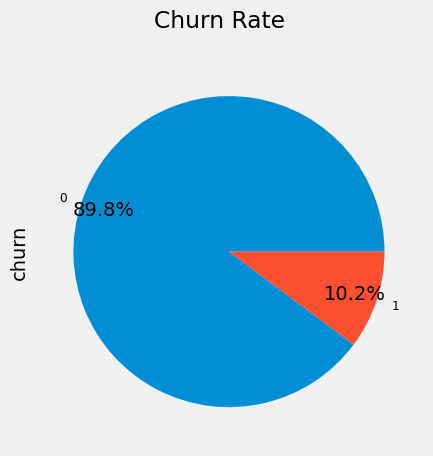

In [52]:
def pie_chart(df):
    df['churn'].value_counts().plot.pie(autopct='%1.1f%%', pctdistance=0.85)
    centre_circle= plt.Circle((0,0),0.5, fc='white')
    fig = plt.gcf()
    # Adding Title of chart
    plt.suptitle('Churn Rate')
    # Displaying Chart
    plt.show()
pie_chart(df)

###  Churn vs Non-Churn

In [53]:
churn_df = df.loc[df['churn']==1 , :]
non_churn_df = df.loc[df['churn'] == 0 , :]


def churn_vs_non_chrun(churn_df, non_churn_df, column_name):
    plt.figure(figsize=(20,8))
    plt.subplot(1,2,1)
    plt.grid(True)
    plt.title('Churn customer - ' + column_name)
    sns.distplot(churn_df[column_name])

    plt.subplot(1,2,2)
    plt.grid(True)
    plt.title('Non-Churn customer - ' + column_name)
    sns.distplot(non_churn_df[column_name])

### Histgram of dataset

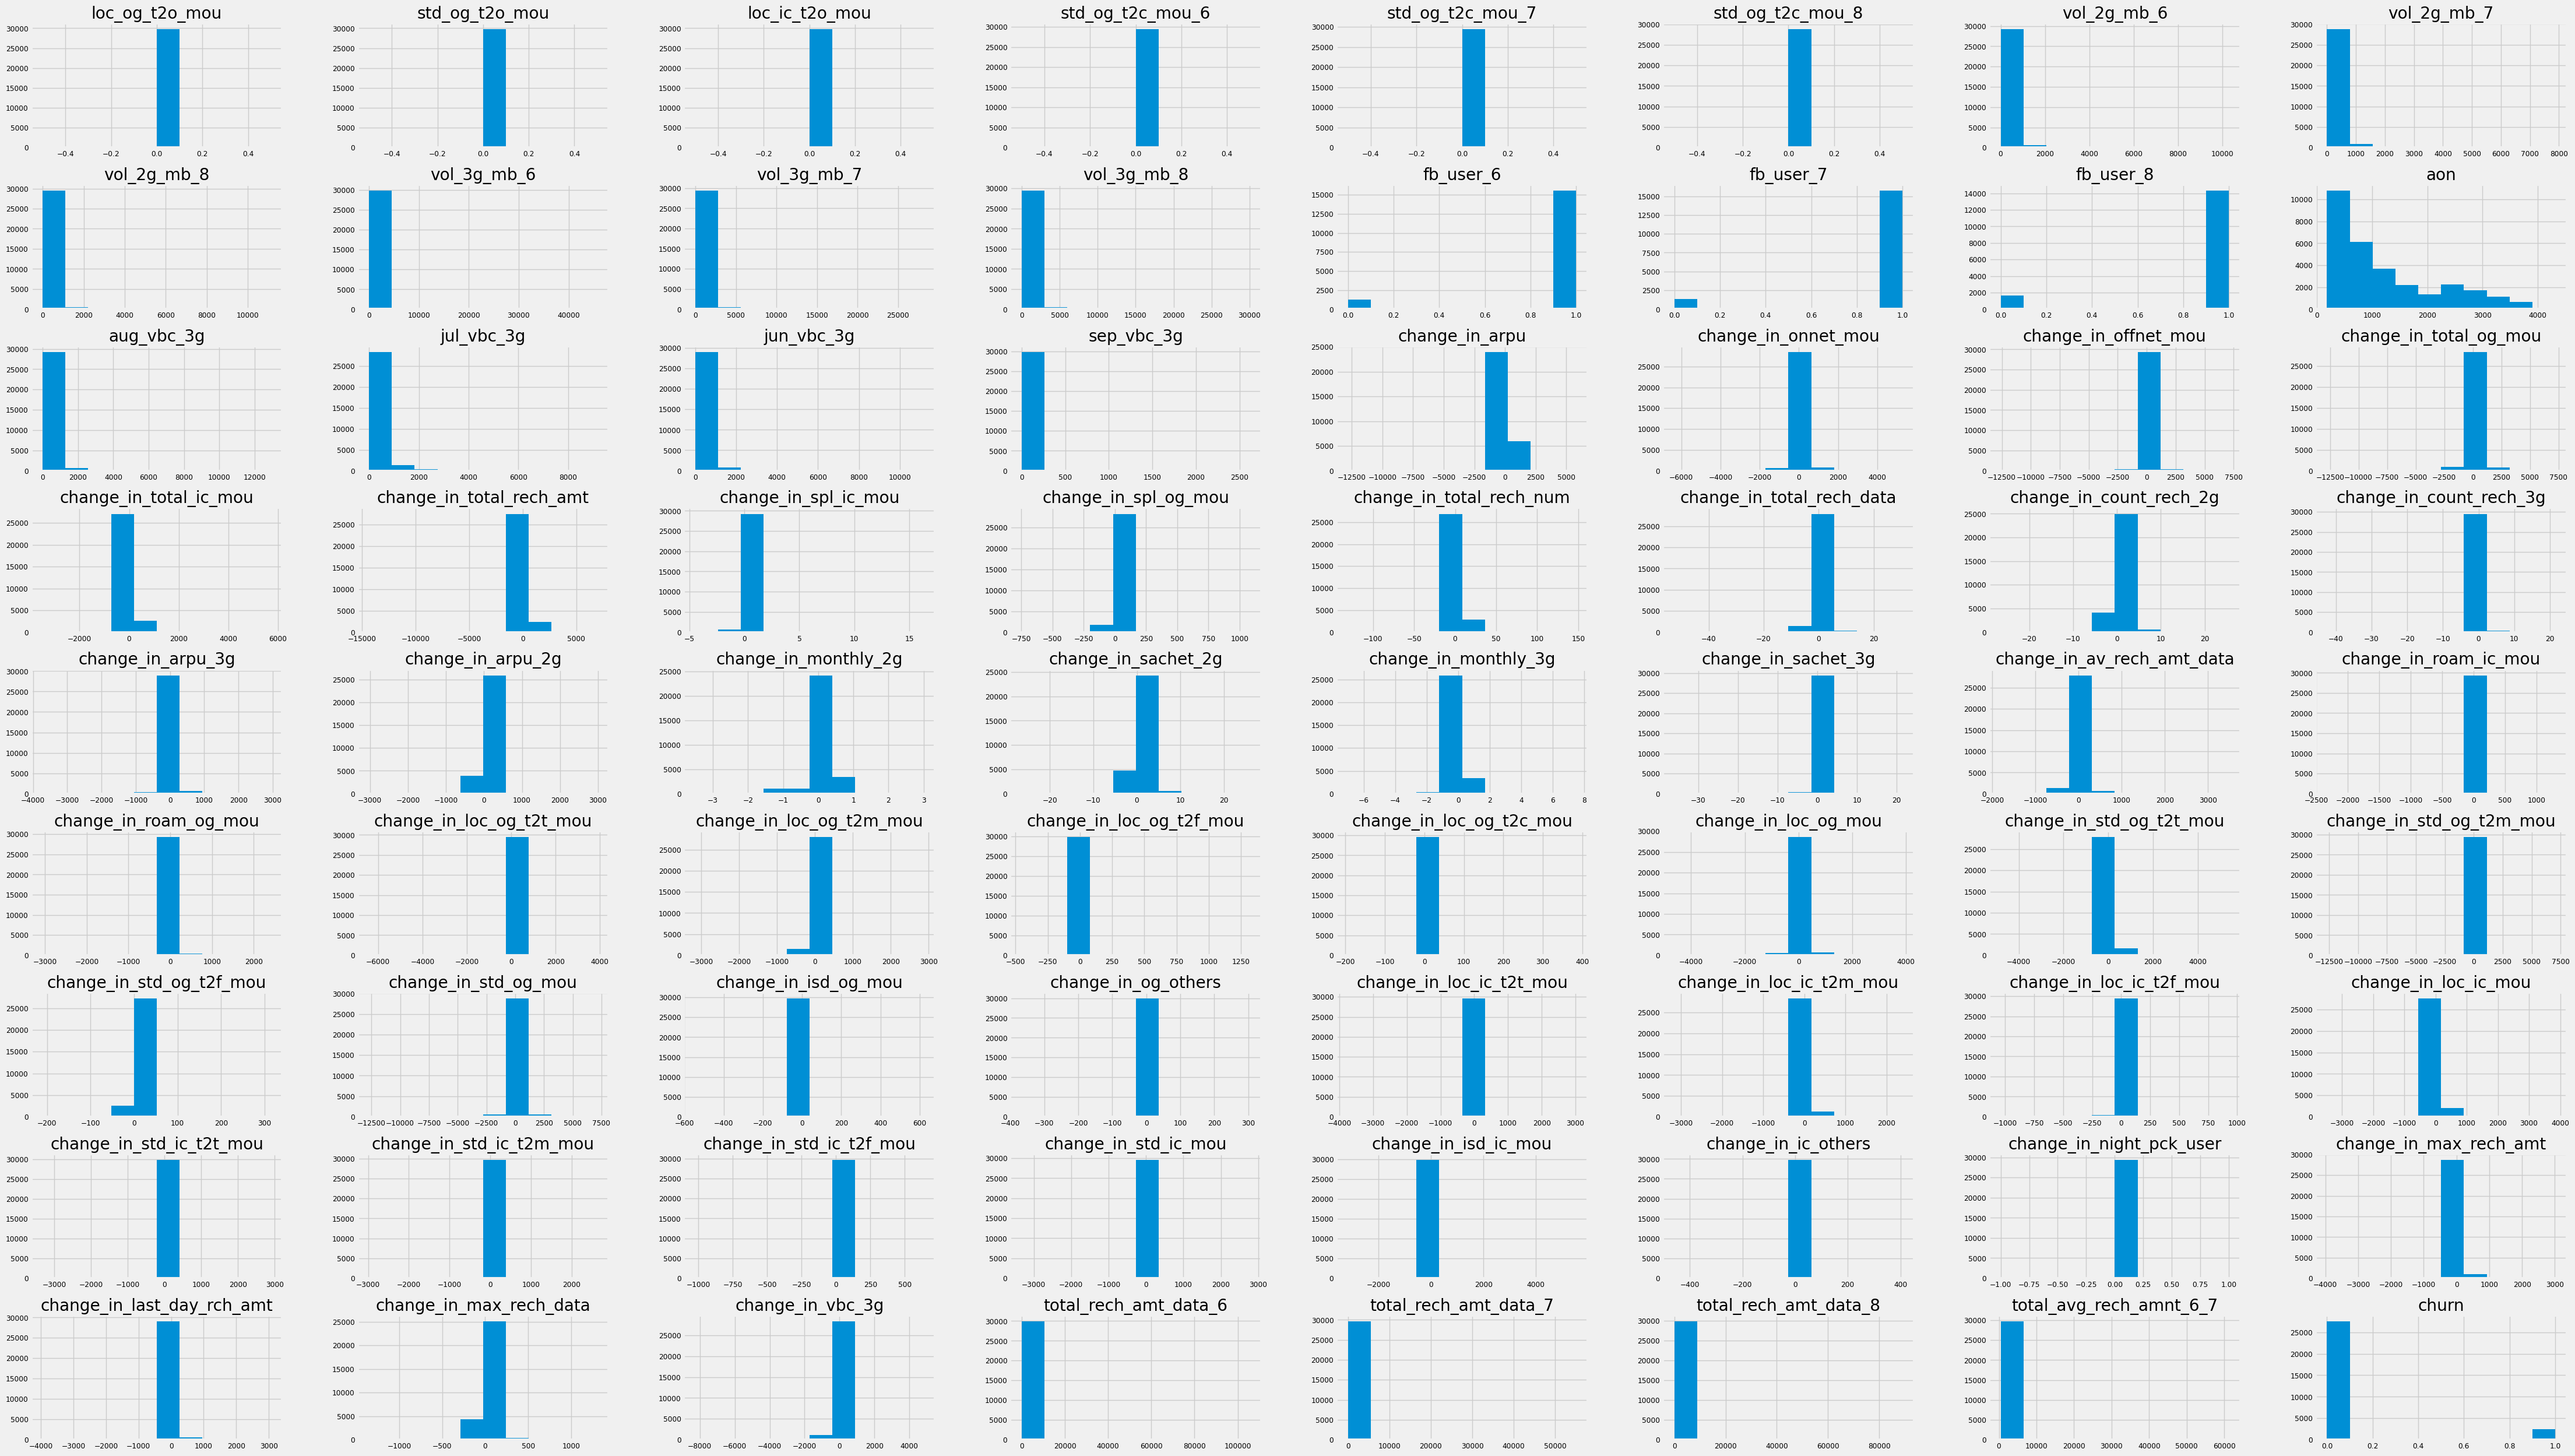

In [126]:
df.hist(figsize = (50, 30))
plt.show();

### Compute the correlation matrix

In [110]:
corr_matrix = df.corr()
# Sort the correlation matrix by the absolute correlation with the target variable
corr_with_target = abs(corr_matrix["churn"]).sort_values(ascending=False)
# Select the top k features based on the correlation with the target variable
k = 30
top_k_features = corr_with_target[1:k+1].index.tolist()
top_k_features

['change_in_arpu',
 'change_in_total_rech_amt',
 'change_in_total_og_mou',
 'change_in_total_rech_num',
 'change_in_std_og_mou',
 'change_in_offnet_mou',
 'aon',
 'change_in_onnet_mou',
 'change_in_total_ic_mou',
 'change_in_max_rech_amt',
 'change_in_std_og_t2m_mou',
 'change_in_std_og_t2t_mou',
 'change_in_loc_ic_mou',
 'change_in_loc_ic_t2m_mou',
 'change_in_loc_og_mou',
 'change_in_loc_og_t2m_mou',
 'change_in_last_day_rch_amt',
 'change_in_total_rech_data',
 'change_in_std_ic_mou',
 'change_in_max_rech_data',
 'change_in_av_rech_amt_data',
 'change_in_count_rech_2g',
 'change_in_spl_og_mou',
 'change_in_sachet_2g',
 'aug_vbc_3g',
 'change_in_std_ic_t2m_mou',
 'vol_2g_mb_8',
 'vol_3g_mb_8',
 'change_in_loc_ic_t2t_mou',
 'change_in_loc_og_t2t_mou']

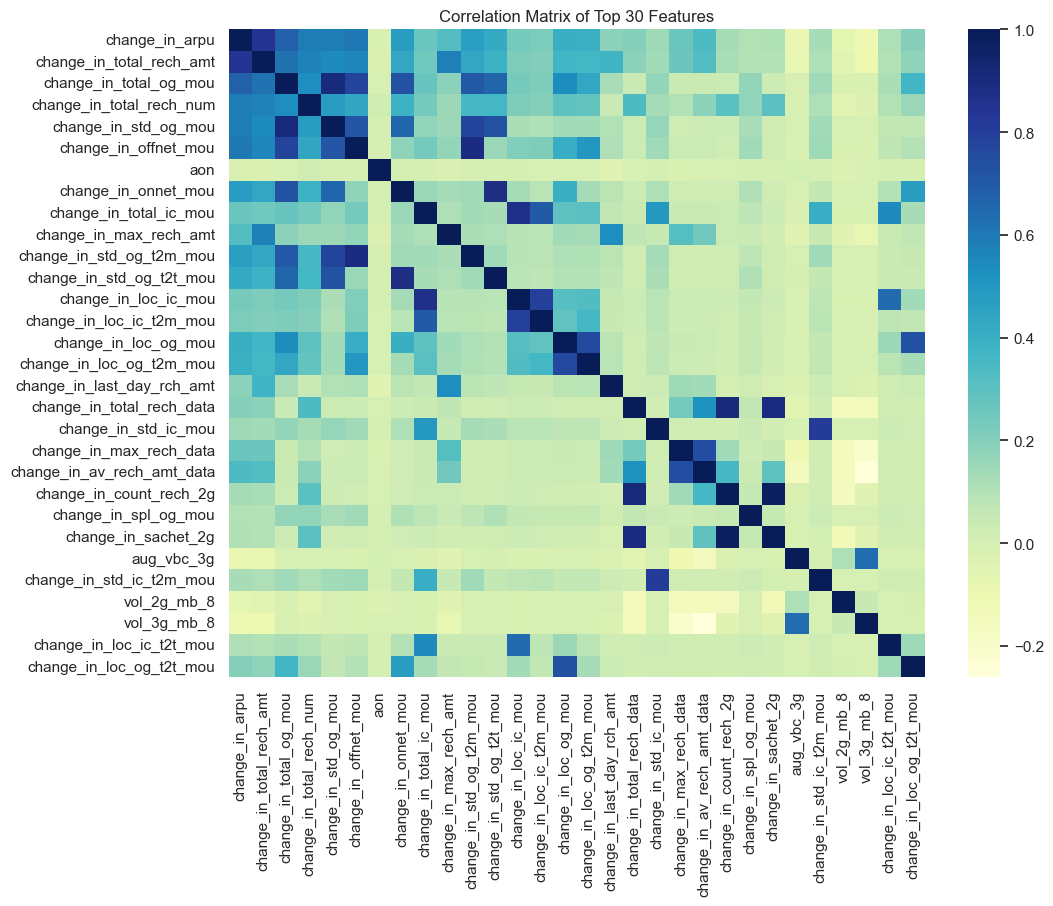

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt
# Select the top k features based on the correlation with the target variable
k = 30
top_k_features = corr_with_target[1:k+1].index.tolist()
# Create a subset of the correlation matrix with the top k features
corr_subset = df[top_k_features].corr()
# Plot the heatmap
sns.set(style="white")
plt.figure(figsize=(10, 8))
sns.heatmap(corr_subset, cmap="YlGnBu")
plt.title("Correlation Matrix of Top {} Features".format(k))
plt.show()

In [197]:
# add the highly correlated features observed from the heatmap to drop lst
high_corr_cols = ['change_in_sachet_2g','change_in_std_og_mou','change_in_total_rech_amt']
drop_lst+=high_corr_cols

Text(0.5, 1.0, 'Correlation Matrix Heatmap with Respect to Churn')

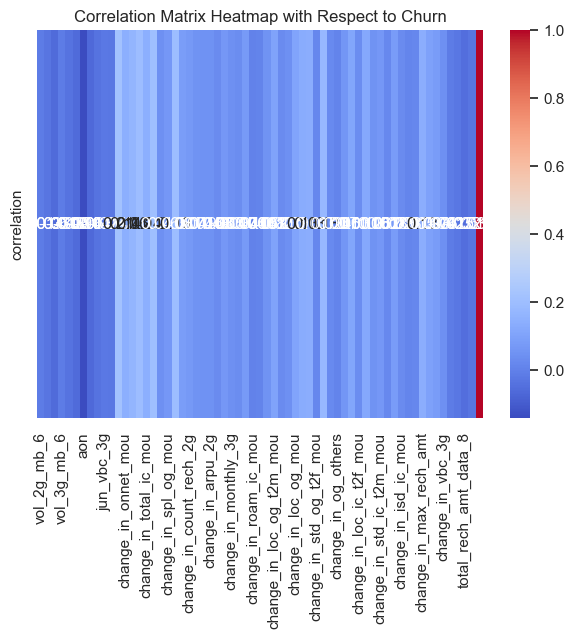

In [113]:
# Compute the correlation matrix with respect to the 'churn' column
corr_matrix = df.corrwith(df['churn'])

# Create a new DataFrame with the correlations
corr_df = pd.DataFrame(corr_matrix, columns=['correlation'])

# Create the heatmap with Seaborn
sns.heatmap(corr_df.transpose(), cmap='coolwarm', annot=True)

# Add a title
plt.title('Correlation Matrix Heatmap with Respect to Churn')


###  Change in KPI's from june and july vs aug

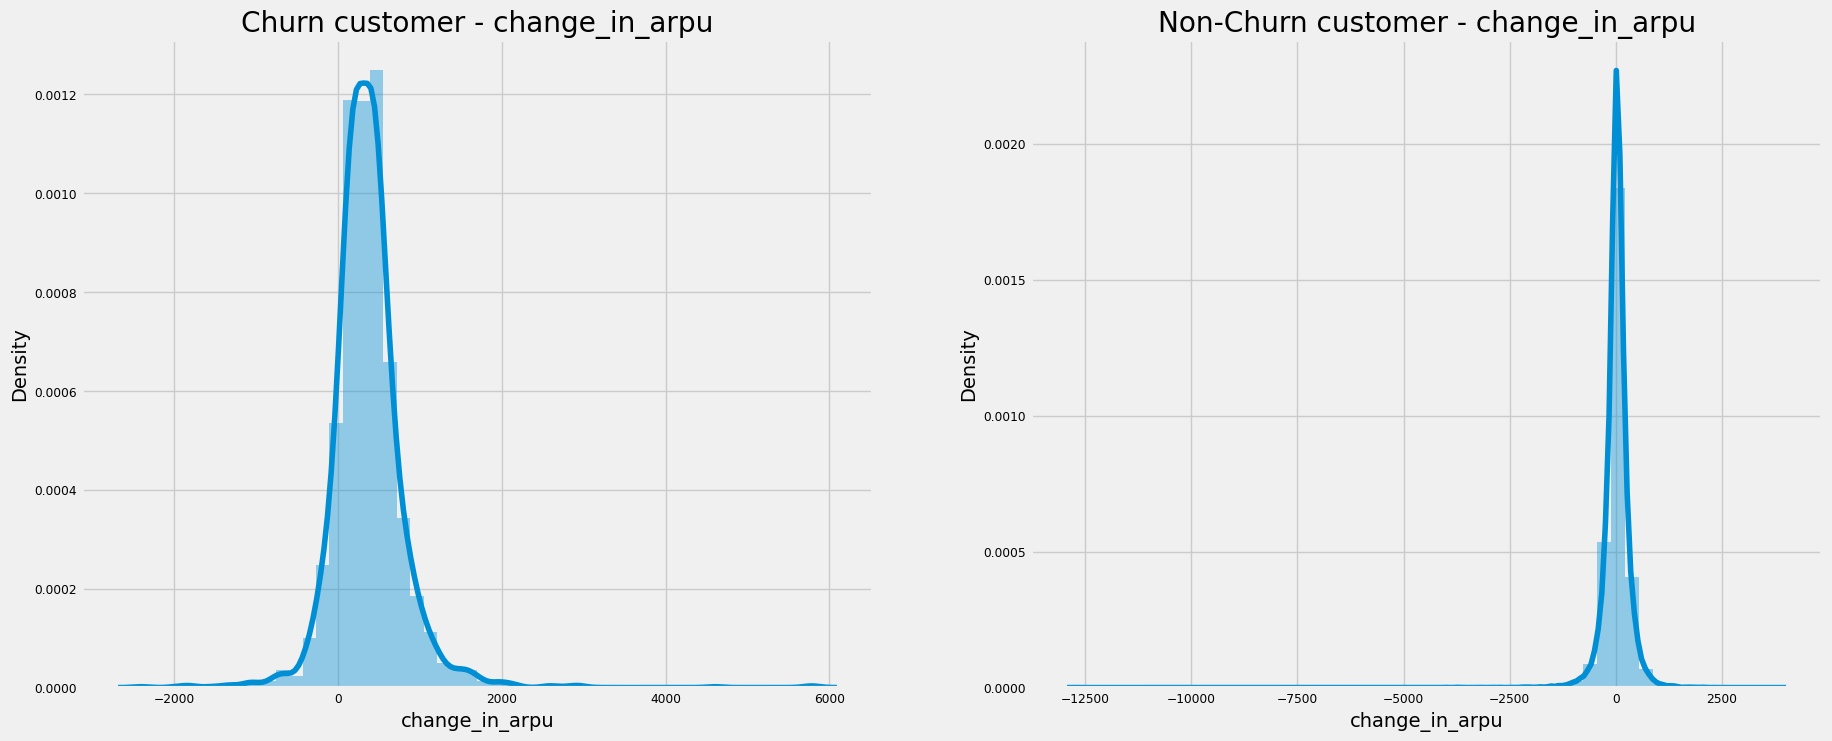

In [947]:
#change_in_arpu
churn_vs_non_chrun(churn_df, non_churn_df, 'change_in_arpu' )

> As we can see above, ARPU(Average Revenue per user) of the churned customers have wider distribution of change in ARPU between june/july and august. Also it is rightly skewed.

> It means that ARPU of august is significantly less compared to jun/july for most of the churned customers

#### Change in the type of phone calls: on-net, off-net

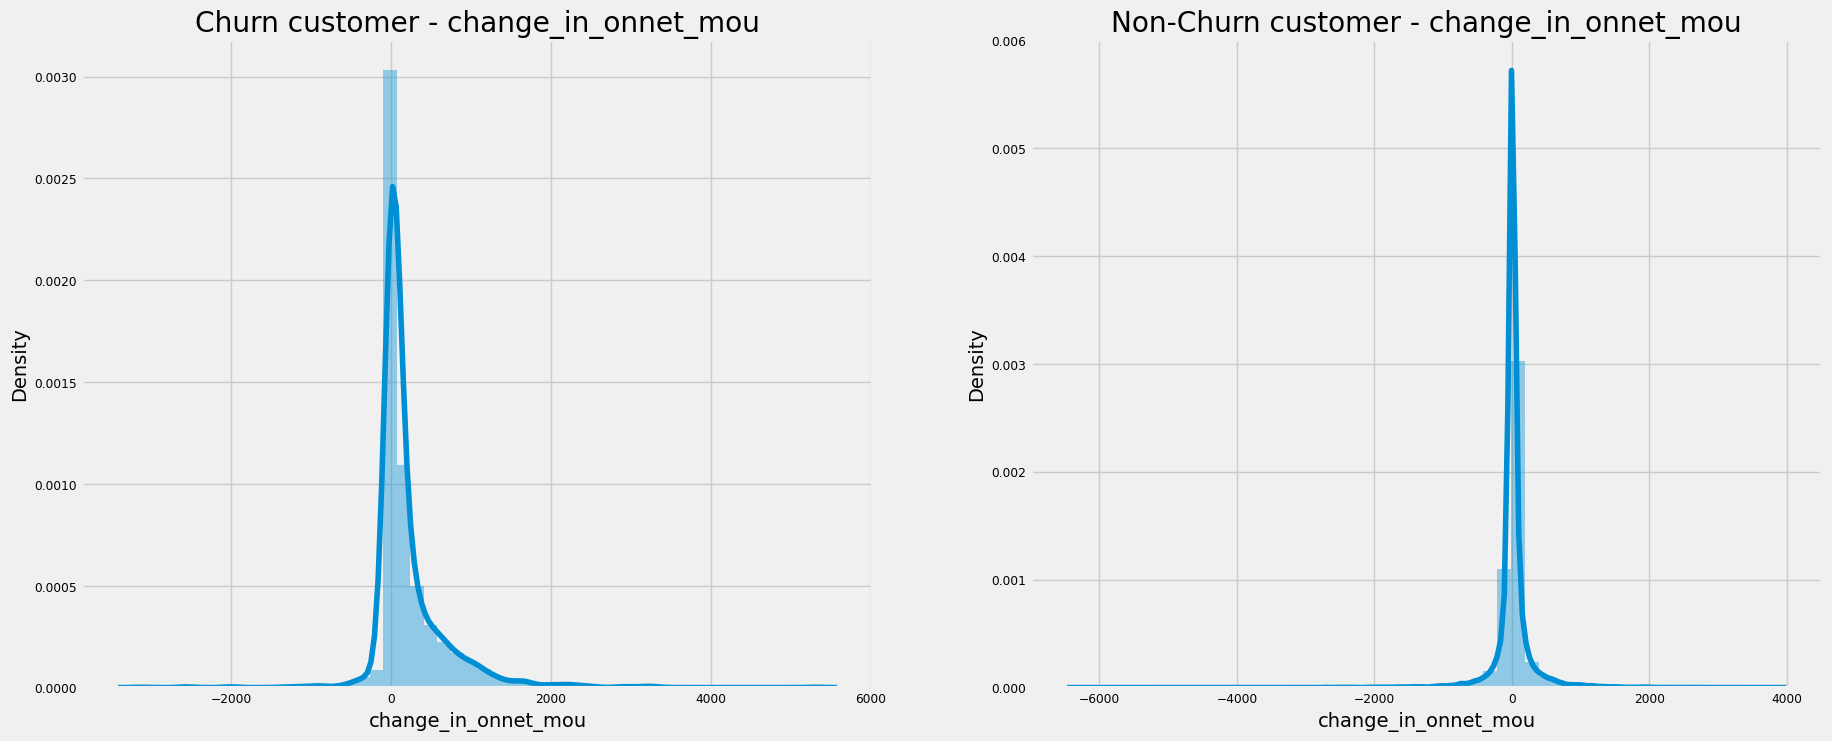

In [948]:
churn_vs_non_chrun(churn_df, non_churn_df, 'change_in_onnet_mou' )

> On-net service: refers to a carrier that owns network facilities at a specific location, is already connected at that location.

> Again on-net calls are going down in aug


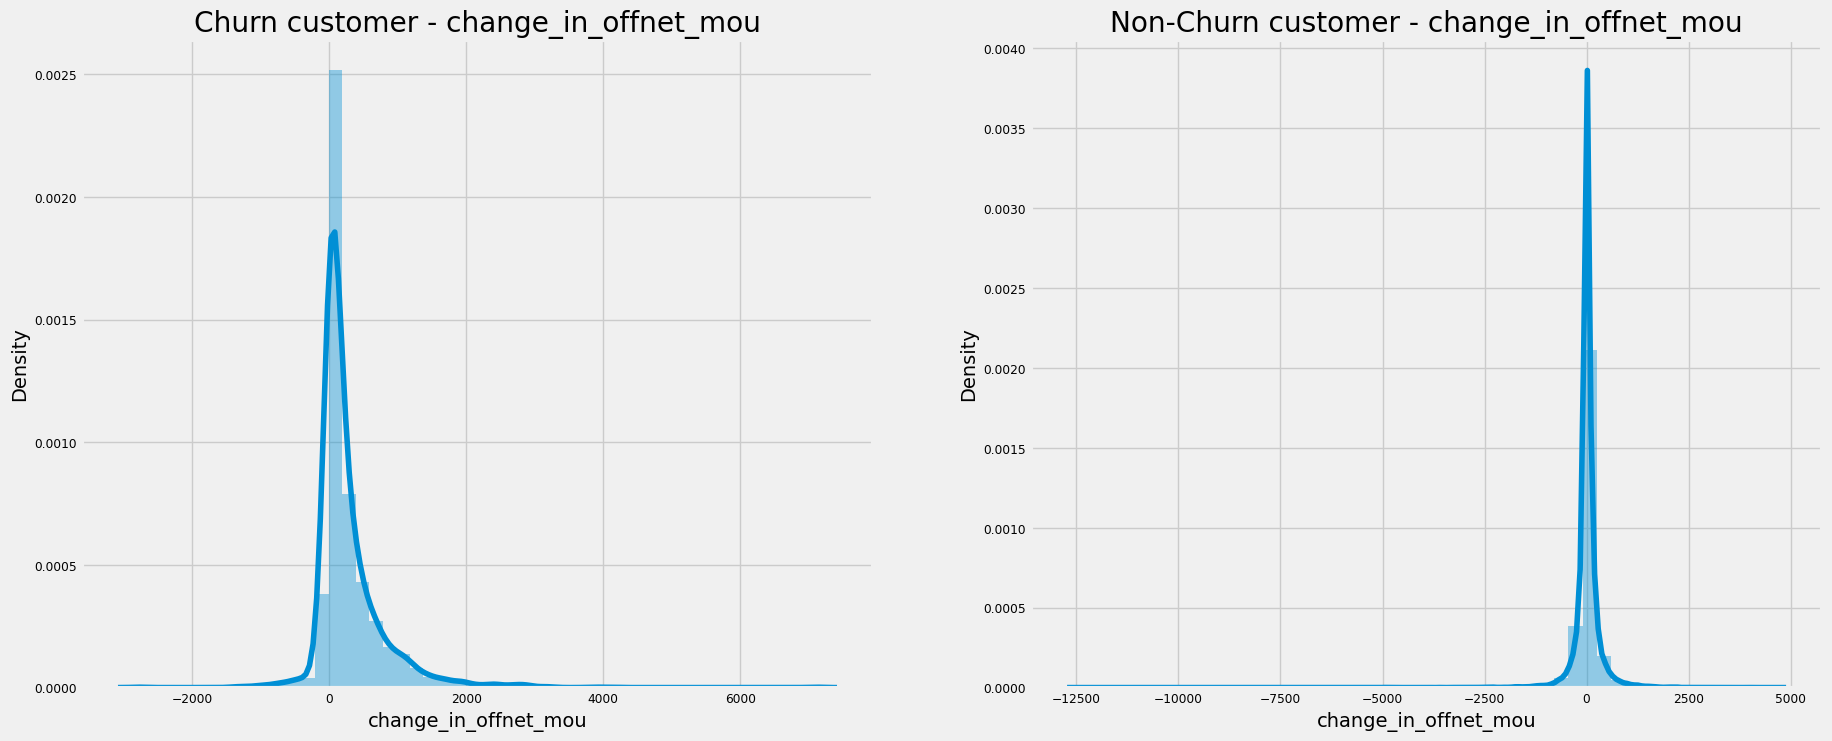

In [949]:
churn_vs_non_chrun(churn_df, non_churn_df, 'change_in_offnet_mou' )

> off-net connectivity refers to a solution provider that has connected to the location by purchasing use of the local network facility through a supplier relationship.
> off-net is following the same trend.

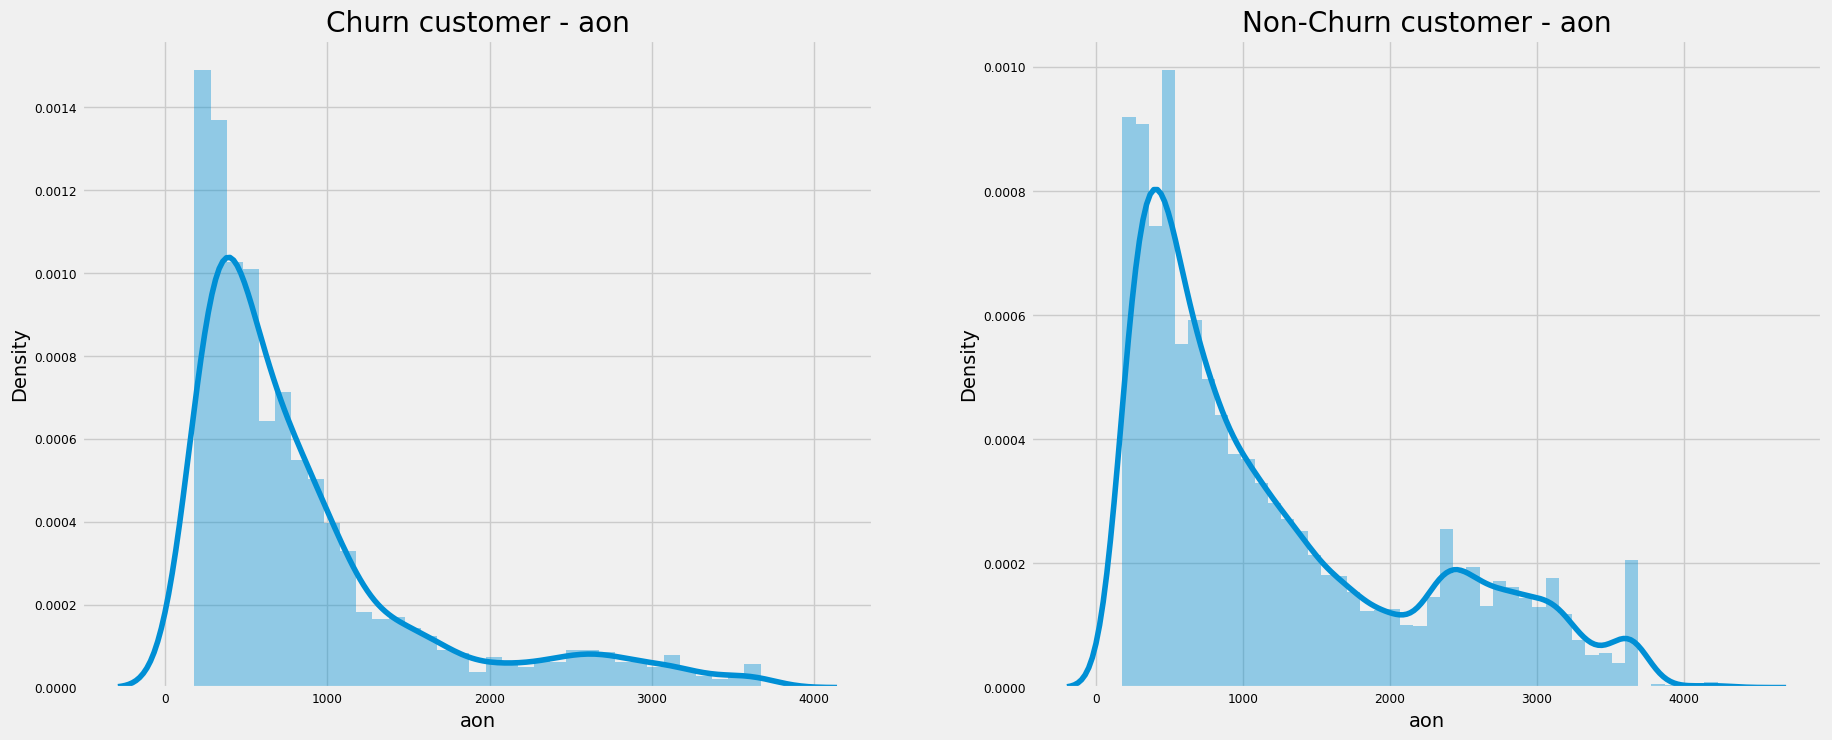

In [950]:
churn_vs_non_chrun(churn_df, non_churn_df, 'aon' )


>Active Optical Networks is showing the abvious result as the customers are churning it is also reducing.

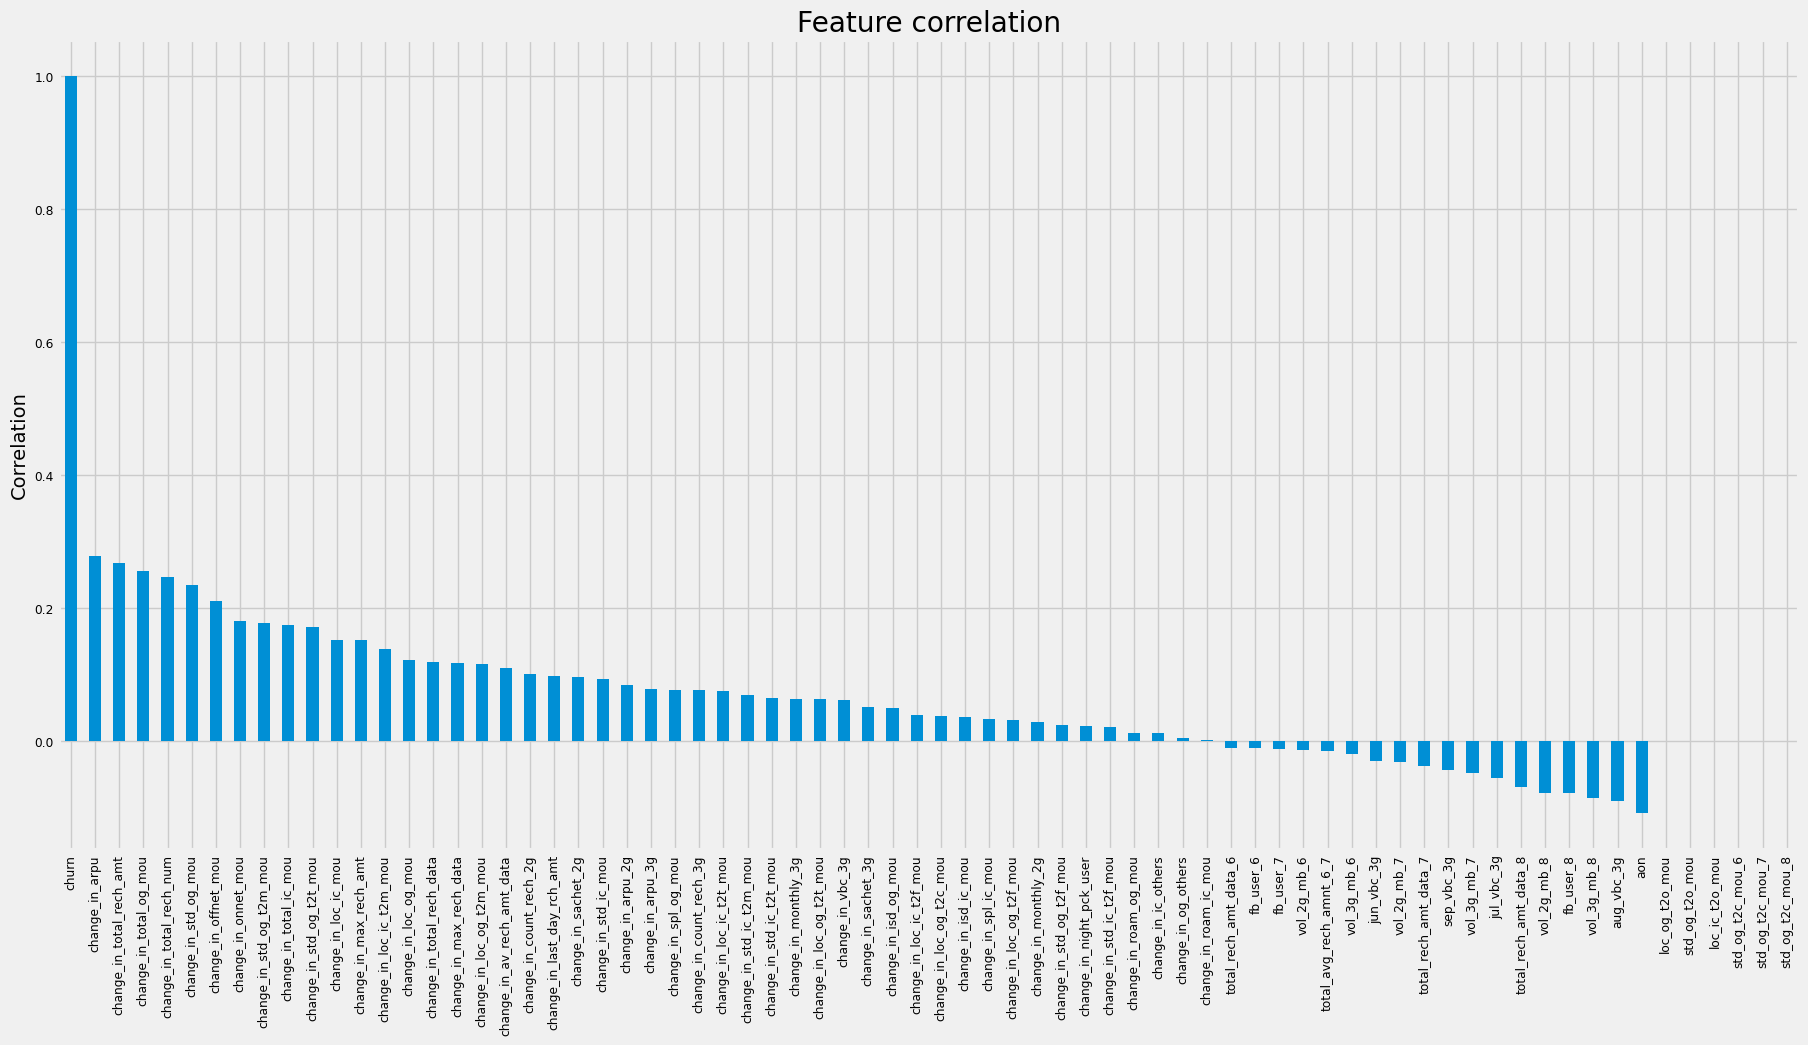

In [131]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(20,10))
df.corr()['churn'].sort_values(ascending = False).plot(kind='bar', grid=True,ylabel = "Correlation", title='Feature correlation');

> Change in :arpu,total_rech_amt, total_og_mou, total_rech_num are few of the positivily correlated columns.
> whereas AON, aug_vbc_3g... are negativly correlated.

In [29]:
#clean the dataset for the final time
df,drop_lst = data_cleaning(df,drop_lst)
print("Shape of dataset after cleaning and feature engineering : ",df.shape)

Shape of dataset after cleaning and feature engineering :  (99999, 72)


# 6. Data Modeling and Parameter Tuning
 [Table of contents](#Table-of-Contents)

## 6.1 Data preperation

### 6.1.1 Split the data into test, train and validation set

In [199]:
X=df.drop(['churn'],axis=1)
y=df['churn']
# Split the data
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.15, random_state=42,stratify=y )
X_train, X_val, y_train, y_val=train_test_split(X_train_full, y_train_full, test_size=0.17, random_state=42,stratify=y_train_full)

In [200]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_val: ",X_val.shape)
print("Shape of X_test: ",X_test.shape)

Shape of X_train:  (70549, 68)
Shape of X_val:  (14450, 68)
Shape of X_test:  (15000, 68)


### 6.1.2 Define the categorical and numerical columns

In [201]:
cat_missing_cols= X_train.select_dtypes(exclude=['int', 'float'] ).columns.tolist()
all_num_columns = X_train.select_dtypes(include=['int', 'float'] ).columns.tolist()
# numeric columns with outliers
num_outlier_cols = find_outliers(X_train)
# rest of the numeric columns
set1 = set(num_outlier_cols)
set2 = set(all_num_columns)
numeric_cols = list(set1.symmetric_difference(set2))

### 6.1.3 Functions for the pipelines

In [202]:
def replace_nan(f):
    f= np.where(np.array(f)== 'nan',np.nan,f)
    return f

In [203]:
def handle_outliers(x):
    # Detect outliers using a specific method, e.g. IQR
    Q1 = np.percentile(x, 25)
    Q3 = np.percentile(x, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Replace outliers with a specific value or perform another handling method
    x[(x < lower_bound) | (x > upper_bound)] = np.median(x)  # Example: replace outliers with median
    return x

### 6.1.4 Pipelines to handle the categorical and numerical columns

In [204]:
# Categorical Pipeline
cat_pipe = Pipeline(steps=[('replace_nans',FunctionTransformer(replace_nan)),
                            ('impute',SimpleImputer(strategy='most_frequent')),
                            ('te',TargetEncoder(handle_unknown='ignore'))               
                        ])  
# Pipeline to handle outliers  in numerical columns
outlier_pipe = Pipeline(steps=[('out_pipe',FunctionTransformer(func=handle_outliers)),
                              ('scaler', StandardScaler())])
# Pipeline to scale rest of the numeric columns
num_pipe = Pipeline(steps=[('scaler', StandardScaler())]) 

# Transformer to implement all the pipelines
prep_trans = ColumnTransformer(transformers=[('cat',cat_pipe,cat_missing_cols),
                                            ('num',num_pipe,numeric_cols),
                                            ('outlier',outlier_pipe,num_outlier_cols)
                                            ],remainder='passthrough')

## 6.2 Training the models

### Baseline model:
### 6.2.1 Logistic Regression 

In [139]:
final_pipeline_lr = Pipeline(steps=[('prep_trans',prep_trans), 
                                    ('dim reduction', PCA(n_components=10,svd_solver='randomized', random_state=42)),
                                    ('smote',SMOTE(random_state=42)),                                                                        
                                    ('model_lr', LogisticRegression())
                                     ])

In [140]:
final_pipeline_lr.fit(X_train,y_train)

Pipeline(steps=[('prep_trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('replace_nans',
                                                                   FunctionTransformer(func=<function replace_nan at 0x000001FF9A75FBE0>)),
                                                                  ('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('te',
                                                                   TargetEncoder(handle_unknown='ignore'))]),
                                                  ['fb_user_6', 'fb_user_7',
                                                   'fb_user_8',
                                                   'day_of_last_rech_6'...
                                                   'change_in_max_rech_data',
                                                   'change_in_monthly_2g',
                                                   'change_in_monthly_3g',
                                                   'change_in_night_pck_user',
                                                   'change_in_offnet_mou',
                                                   'change_in_og_others',
                                                   'change_in_onnet_mou',
                                                   'change_in_roam_ic_mou',
                                                   'change_in_roam_og_mou', ...])])),
                ('dim reduction',
                 PCA(n_components=10, random_state=42,
                     svd_solver='randomized')),
                ('smote', SMOTE(random_state=42)),
                ('model_lr', LogisticRegression())])

In [141]:
y_pred1 = final_pipeline_lr.predict(X_val)

In [142]:
print(classification_report(y_val, y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.65      0.76     12977
           1       0.14      0.50      0.22      1473

    accuracy                           0.64     14450
   macro avg       0.53      0.58      0.49     14450
weighted avg       0.84      0.64      0.71     14450



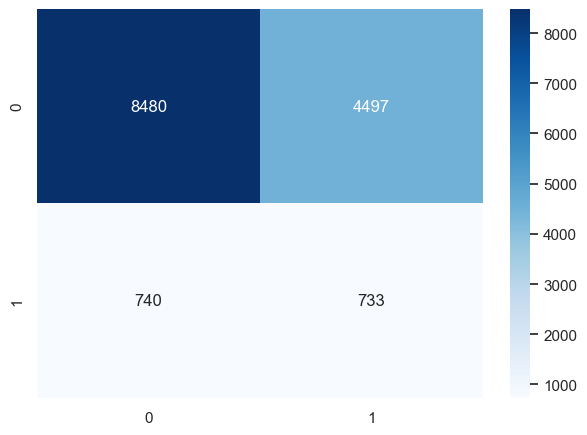

In [143]:
# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_val, y_pred1), annot=True, fmt='d', cmap='Blues');

In [144]:
#since this dataset is completely imbalanced so we will get accuracy by roc_auc_score
print('The accuracy of the model is:',roc_auc_score(y_val,y_pred1))

The accuracy of the model is: 0.5755438587074599


### Logistic Regression parameter tuning with gridsearchcv

In [145]:
final_pipeline_lr = Pipeline(steps=[
                                    ('prep_trans',prep_trans),  
                                    ('dim reduction',PCA(n_components=10,svd_solver='randomized', random_state=42)),
                                    ('smote',SMOTE(random_state=42)),
                                    ('model_lr', LogisticRegression())
                                     ])

In [150]:
%%time
# define the parameters
params = {'model_lr__C': [0.001, 0.01, 0.1, 10,100],
          'model_lr__penalty': ['l1', 'l2'],
          'model_lr__solver': ['lbfgs', 'saga','newton-cg'],
          'model_lr__max_iter': [100, 500, 700]}

# define grid search
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search_lr = GridSearchCV(final_pipeline_lr, param_grid=params, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result_lr = grid_search_lr.fit(X_train,y_train)

CPU times: total: 28min 50s
Wall time: 34min 32s


In [151]:
best_parameters_lr = grid_result_lr.best_params_
print("Best Parameters :",best_parameters_lr)

Best Parameters : {'model_lr__C': 0.001, 'model_lr__max_iter': 500, 'model_lr__penalty': 'l1', 'model_lr__solver': 'saga'}


              precision    recall  f1-score   support

           0       0.92      0.66      0.77     12977
           1       0.14      0.48      0.21      1473

    accuracy                           0.64     14450
   macro avg       0.53      0.57      0.49     14450
weighted avg       0.84      0.64      0.71     14450

The accuracy of the model on validation-set is: 0.6188135560324206


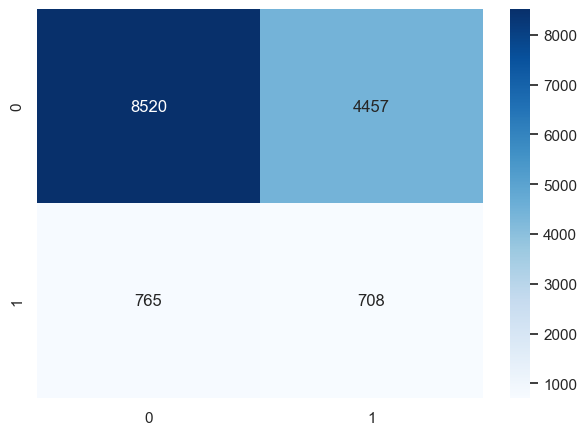

In [152]:
best_est_lr = grid_result_lr.best_estimator_
y_pred_lr = best_est_lr.predict(X_val)
y_pred_prob_lr = best_est_lr.predict_proba(X_val)
print(classification_report(y_val, y_pred_lr))

# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_val, y_pred_lr), annot=True, fmt='d', cmap='Blues');

#since this dataset is completely imbalanced so we will get accuracy by roc_auc_score
print('The accuracy of the model on validation-set is:',roc_auc_score(y_val,y_pred_prob_lr[:, 1]))

In [153]:
#find true positive rate (TPR), false positive rate (FPR)                
lr_fpr_val, lr_tpr_val, lr_thresholds_val = roc_curve(y_val, y_pred_prob_lr[:, 1])
lr_roc_val = auc(lr_fpr_val, lr_tpr_val)
#Note: we are more interested in the TPR, as it is the proportion of actual positive observations that are correctly classified as positive

### Final Prediction of Logistic Regressor

              precision    recall  f1-score   support

           0       0.91      0.69      0.79     13471
           1       0.13      0.42      0.20      1529

    accuracy                           0.66     15000
   macro avg       0.52      0.56      0.50     15000
weighted avg       0.83      0.66      0.73     15000

The roc of the LR model is:  0.61
F1-score of LR model is:  0.204
CPU times: total: 2.67 s
Wall time: 1.1 s


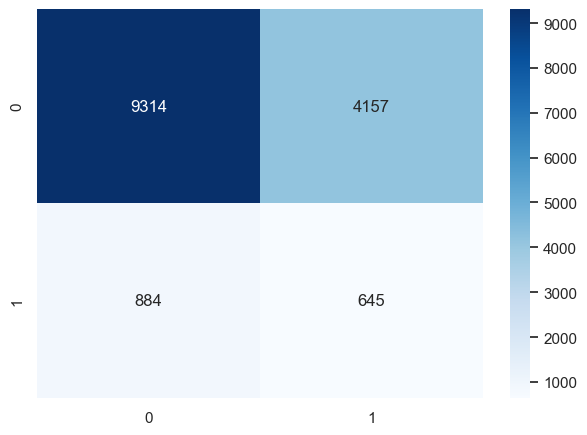

In [208]:
%%time
#Update the pipeline with best parameters
best_pipeline_lr = Pipeline(steps=[('prep_trans',prep_trans), 
                                    ('dim reduction', PCA(n_components=10,svd_solver='randomized', random_state=42)),
                                    ('smote',SMOTE(random_state=42)),                                                                        
                                    ('model_lr', LogisticRegression(C = 0.001, max_iter=500, penalty='l1',solver = 'saga'))
                                     ])
best_model_lr = best_pipeline_lr.fit(X_test,y_test)
y_pred_lr_final = best_model_lr.predict(X_test)
y_pred_prob_lr_final = best_est_lr.predict_proba(X_test)
print(classification_report(y_test, y_pred_lr_final))

# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr_final), annot=True, fmt='d', cmap='Blues');
roc_lr = roc_auc_score(y_test,y_pred_prob_lr_final[:, 1])
print('The roc of the LR model is: ',np.round(roc_lr,3))
f1_lr = f1_score(y_test, y_pred_lr_final)
print('F1-score of LR model is: ',np.round(f1_lr,3))

lr_fpr_test, lr_tpr_test, lr_thresholds_test = roc_curve(y_test, y_pred_prob_lr_final[:, 1])
lr_roc_test= auc(lr_fpr_test, lr_tpr_test)

In [196]:
# Make grid search summary table
lr_model_stats = pd.DataFrame(grid_result_lr.cv_results_)
lr_model_stats = lr_model_stats.sort_values(by='rank_test_score', ascending=False).reset_index()
#lr_model_stats

### ROC curve for Logistic Regression

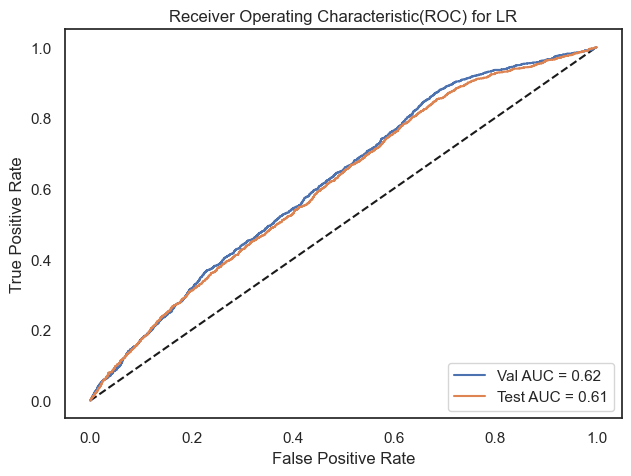

In [165]:
### Plotting the roc curve
plt.plot([0, 1], [0, 1], 'k--')  # plot the diagonal line
plt.plot(lr_fpr_val, lr_tpr_val, label='Val AUC = {:.2f}'.format(lr_roc_val))
plt.plot(lr_fpr_test, lr_tpr_test, label='Test AUC = {:.2f}'.format(lr_roc_test))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(ROC) for LR')
plt.legend(loc='lower right')
plt.show()

Insight:
>  the model has a higher TPR for a given FPR

> the AUC values for the validation set and test set are similar, indicating that the model is generalizing well to new data.

> the AUC value for the test set is not lower than that of the validation set which indicates that the model is not overfitting to the training data and generalizing well to new data.

### 6.3.2  XGBoost :eXtreme Gradient Boosting

In [211]:
final_pipeline_xgb = Pipeline(steps=[
                                    ('prep_trans',prep_trans),                                    
                                    ('dim reduction',PCA(n_components=10,svd_solver='randomized', random_state=42)),
                                    ('smote',SMOTE(random_state=42)),
                                    ('model_xgb', XGBClassifier())
                                     ])

In [212]:
final_pipeline_xgb.fit(X_train,y_train)

Pipeline(steps=[('prep_trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('replace_nans',
                                                                   FunctionTransformer(func=<function replace_nan at 0x000001FFDB1F9240>)),
                                                                  ('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('te',
                                                                   TargetEncoder(handle_unknown='ignore'))]),
                                                  ['fb_user_6', 'fb_user_7',
                                                   'fb_user_8',
                                                   'day_of_last_rech_6'...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

              precision    recall  f1-score   support

           0       0.95      0.69      0.80     12977
           1       0.20      0.68      0.30      1473

    accuracy                           0.68     14450
   macro avg       0.57      0.68      0.55     14450
weighted avg       0.87      0.68      0.75     14450

The auc of the model is: 0.6805448942750612


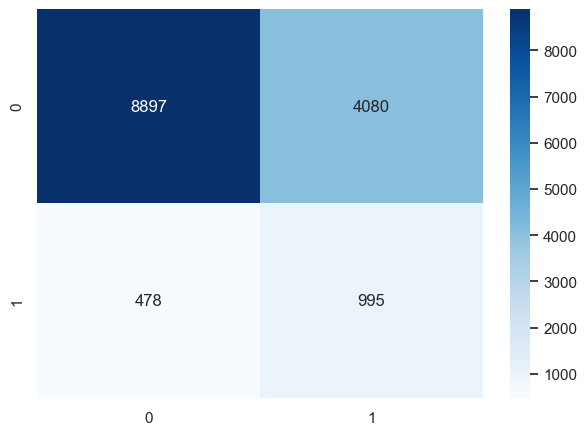

In [213]:
y_pred = final_pipeline_xgb.predict(X_val)
print(classification_report(y_val, y_pred))
print('The auc of the model is:',roc_auc_score(y_val,y_pred))
# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='Blues');

### XGBoost with grid searchcv

In [214]:
%%time
# A parameter grid for XGBoost
params = {
        'model_xgb__min_child_weight': [1, 5],
        'model_xgb__gamma': [0.5, 2],
        'model_xgb__max_depth': [4, 8]
        }

# define grid search
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search_xg = GridSearchCV(final_pipeline_xgb, param_grid=params, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result_xg = grid_search_xg.fit(X_train,y_train)

CPU times: total: 2min 37s
Wall time: 22min 39s


In [215]:
best_parameters_xg = grid_result_xg.best_params_
print("Best Parameters :",best_parameters_xg)

Best Parameters : {'model_xgb__gamma': 0.5, 'model_xgb__max_depth': 8, 'model_xgb__min_child_weight': 1}


              precision    recall  f1-score   support

           0       0.94      0.74      0.83     12977
           1       0.21      0.61      0.31      1473

    accuracy                           0.73     14450
   macro avg       0.58      0.68      0.57     14450
weighted avg       0.87      0.73      0.78     14450

The accuracy of the model is: 0.7218115700130802


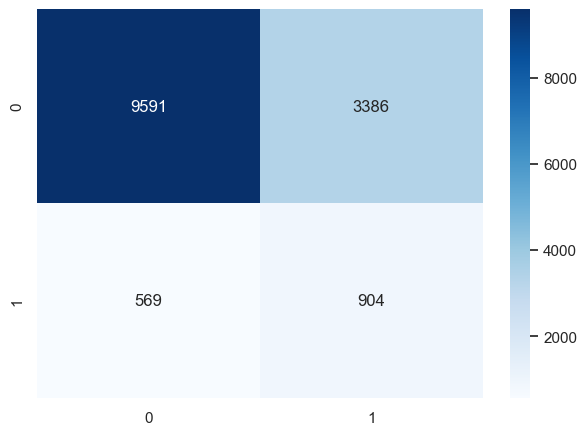

In [216]:
#Prediction on validation set
best_est_xg = grid_result_xg.best_estimator_
y_pred_xg = best_est_xg.predict(X_val)
y_pred_prob_xg = best_est_xg.predict_proba(X_val)

print(classification_report(y_val, y_pred_xg))
# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_val, y_pred_xg), annot=True, fmt='d', cmap='Blues');

#since this dataset is completely imbalanced so we will get accuracy by roc_auc_score
print('The accuracy of the model is:',roc_auc_score(y_val,y_pred_prob_xg[:, 1]))             
xg_fpr_val, xg_tpr_val, xg_thresholds_val = roc_curve(y_val, y_pred_prob_xg[:, 1])
xg_roc_val= auc(xg_fpr_val, xg_tpr_val)

In [217]:
# Make grid search summary table
xg_model_stats = pd.DataFrame(grid_result_xg.cv_results_)
xg_model_stats = xg_model_stats.sort_values(by='rank_test_score', ascending=False).reset_index()

### Final Prediction of XGBClassifier

              precision    recall  f1-score   support

           0       0.98      0.86      0.92     13471
           1       0.41      0.86      0.55      1529

    accuracy                           0.86     15000
   macro avg       0.69      0.86      0.73     15000
weighted avg       0.92      0.86      0.88     15000

The roc of the xg model is:  0.936
F1-score of xg model is:  0.553
CPU times: total: 20.4 s
Wall time: 2.18 s


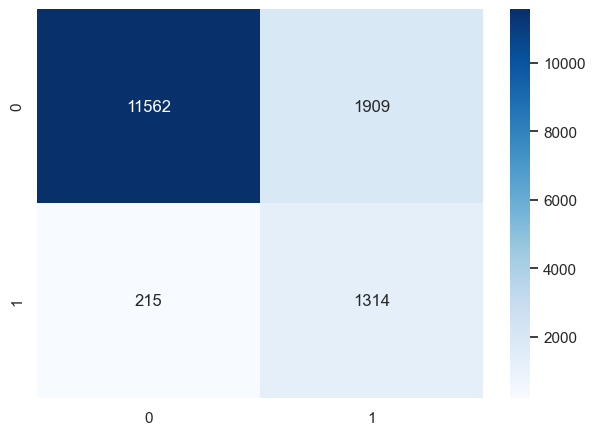

In [218]:
%%time
#Prediction on test set
best_pipeline_xg = Pipeline(steps=[ ('prep_trans',prep_trans),                                    
                                    ('dim reduction',PCA(n_components=10,svd_solver='randomized', random_state=42)),
                                    ('smote',SMOTE(random_state=42)),
                                    ('model_xgb', XGBClassifier(gamma = 0.5,max_depth = 8, min_child_weight = 1))
                                     ])
best_model_xg = best_pipeline_xg.fit(X_test,y_test)

y_pred_xg_final = best_model_xg.predict(X_test)
print(classification_report(y_test, y_pred_xg_final))
y_pred_prob_xg_final = best_model_xg.predict_proba(X_test)
# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_xg_final), annot=True, fmt='d', cmap='Blues');

#since this dataset is completely imbalanced so we will get accuracy by roc_auc_score
roc_xg = roc_auc_score(y_test,y_pred_prob_xg_final[:, 1])
print('The roc of the xg model is: ',np.round(roc_xg,3))
f1_xg = f1_score(y_test, y_pred_xg_final)
print('F1-score of xg model is: ',np.round(f1_xg,3))

xg_fpr_test, xg_tpr_test, xg_thresholds_test = roc_curve(y_test, y_pred_prob_xg_final[:,1])
xg_roc_test= auc(xg_fpr_test, xg_tpr_test)

### ROC curve for XGBClassifier

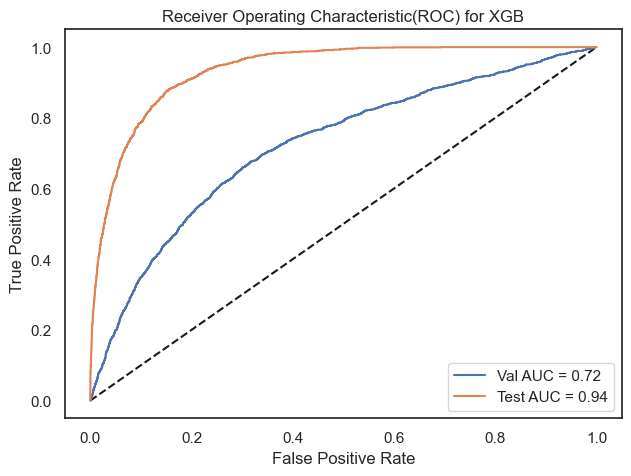

In [219]:
### Plotting the roc curve
plt.plot([0, 1], [0, 1], 'k--')  # plot the diagonal line
plt.plot(xg_fpr_val, xg_tpr_val, label='Val AUC = {:.2f}'.format(xg_roc_val))
plt.plot(xg_fpr_test, xg_tpr_test, label='Test AUC = {:.2f}'.format(xg_roc_test))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(ROC) for XGB')
plt.legend(loc='lower right')
plt.show()

### 6.3.3 Random Forest Classifier

In [220]:
final_pipeline_rfc = Pipeline(steps=[
                                    ('prep_trans',prep_trans),  
                                    ('dim reduction',PCA(n_components=10,svd_solver='randomized', random_state=42)),
                                    ('smote',SMOTE(random_state=42)),
                                    ('model_rfc', RandomForestClassifier())
                                     ])

In [221]:
final_pipeline_rfc.fit(X_train,y_train)

Pipeline(steps=[('prep_trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('replace_nans',
                                                                   FunctionTransformer(func=<function replace_nan at 0x000001FFDB1F9240>)),
                                                                  ('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('te',
                                                                   TargetEncoder(handle_unknown='ignore'))]),
                                                  ['fb_user_6', 'fb_user_7',
                                                   'fb_user_8',
                                                   'day_of_last_rech_6'...
                                                   'change_in_max_rech_data',
                                                   'change_in_monthly_2g',
                                                   'change_in_monthly_3g',
                                                   'change_in_night_pck_user',
                                                   'change_in_offnet_mou',
                                                   'change_in_og_others',
                                                   'change_in_onnet_mou',
                                                   'change_in_roam_ic_mou',
                                                   'change_in_roam_og_mou', ...])])),
                ('dim reduction',
                 PCA(n_components=10, random_state=42,
                     svd_solver='randomized')),
                ('smote', SMOTE(random_state=42)),
                ('model_rfc', RandomForestClassifier())])

              precision    recall  f1-score   support

           0       0.92      0.88      0.90     12977
           1       0.26      0.37      0.30      1473

    accuracy                           0.83     14450
   macro avg       0.59      0.62      0.60     14450
weighted avg       0.86      0.83      0.84     14450

The auc of the model is: 0.6234388733401165


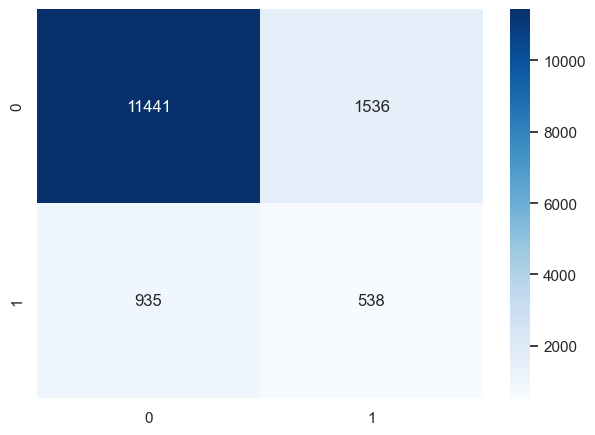

In [222]:
y_pred_rfc = final_pipeline_rfc.predict(X_val)
print(classification_report(y_val, y_pred_rfc))
print('The auc of the model is:',roc_auc_score(y_val,y_pred_rfc))
# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_val, y_pred_rfc), annot=True, fmt='d', cmap='Blues');

### RandomForest Classifier hypertuning with gridsearchcv

In [223]:
%%time
# Parameter Tuning for rfc
params = {
     'model_rfc__n_estimators' : [10,50,100,500],
     'model_rfc__criterion' : ['gini', 'entropy'],
     'model_rfc__max_depth' : [2,4,8,10,12],
     'model_rfc__min_samples_leaf': range(1,5)
        }

# define grid search
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search_rfc = GridSearchCV(final_pipeline_rfc, param_grid=params, n_jobs=-1, cv=cv, scoring='f1',error_score=0)
grid_result_rfc = grid_search_rfc.fit(X_train,y_train)

KeyboardInterrupt: 

In [224]:
best_parameters_rfc = grid_result_rfc.best_params_
print("Best Parameters :",best_parameters_rfc)

NameError: name 'grid_result_rfc' is not defined

In [ ]:
# Validation set computations
best_est_rfc = grid_result_rfc.best_estimator_
y_pred_rfc = best_est_rfc.predict(X_val)
y_pred_prob_rfc = best_est_rfc.predict_proba(X_val)
print(classification_report(y_val, y_pred_rfc))
# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_val, y_pred_rfc), annot=True, fmt='d', cmap='Blues');

#since this dataset is completely imbalanced so we will get accuracy by roc_auc_score
print('The accuracy of the model is:',roc_auc_score(y_val,y_pred_prob_rfc[:, 1]))
#find true positive rate (TPR), false positive rate (FPR)                
rfc_fpr_val, rfc_tpr_val, rfc_thresholds_val = roc_curve(y_val, y_pred_prob_rfc[:, 1])
rfc_roc_val = auc(rfc_fpr_val, rfc_tpr_val)

In [ ]:
# Make grid search summary table
rfc_model_stats = pd.DataFrame(grid_result_rfc.cv_results_)
rfc_model_stats = rfc_model_stats.sort_values(by='rank_test_score', ascending=False).reset_index()

### Final Prediction on test set

              precision    recall  f1-score   support

           0       0.96      0.87      0.91      4128
           1       0.30      0.62      0.40       365

    accuracy                           0.85      4493
   macro avg       0.63      0.75      0.66      4493
weighted avg       0.91      0.85      0.87      4493

The roc of the rfc model is:  0.83
F1-score of rfc model is:  0.405


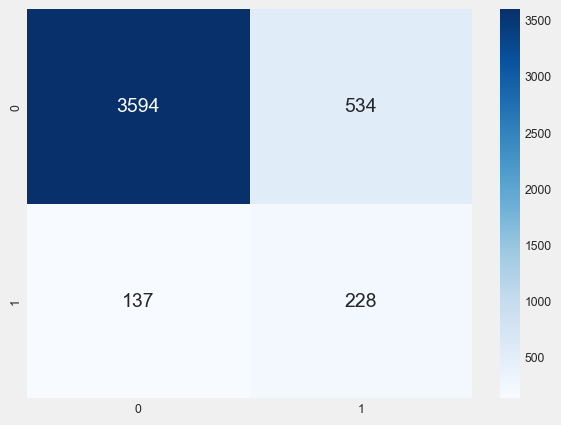

In [1513]:
best_pipeline_rfc = Pipeline(steps=[
                                    ('prep_trans',prep_trans),  
                                    ('dim reduction',PCA(n_components=10,svd_solver='randomized', random_state=42)),
                                    ('smote',SMOTE(random_state=42)),
                                    ('model_rfc', RandomForestClassifier())
                                     ])
best_model_rfc = best_pipeline_rfc.fit(X_test,y_test)
# test set computations
y_pred_rfc_final = best_model_rfc.predict(X_test)
y_pred_prob_rfc_final = best_model_rfc.predict_proba(X_test)
print(classification_report(y_test, y_pred_rfc_final))

# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rfc_final), annot=True, fmt='d', cmap='Blues');

roc_rfc = roc_auc_score(y_test,y_pred_prob_rfc_final[:, 1])
print('The roc of the rfc model is: ',np.round(roc_rfc,3))
f1_rfc = f1_score(y_test, y_pred_rfc_final)
print('F1-score of rfc model is: ',np.round(f1_rfc,3))

rfc_fpr_test, rfc_tpr_test, rfc_thresholds_test = roc_curve(y_test, y_pred_prob_rfc_final[:, 1])
rfc_roc_test= auc(rfc_fpr_test, rfc_tpr_test)

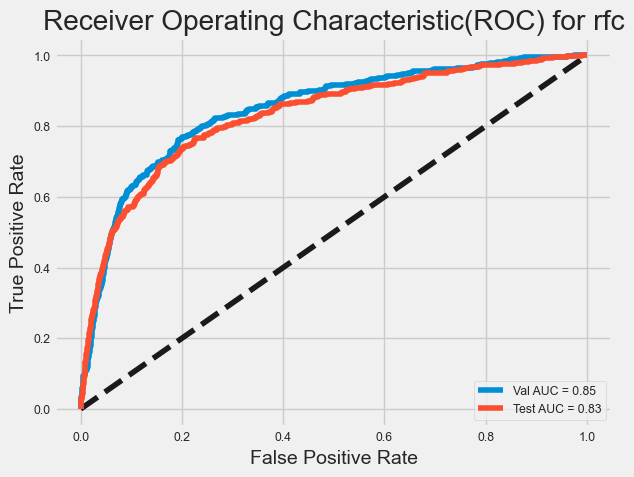

In [1479]:
### Plotting the roc curve
plt.plot([0, 1], [0, 1], 'k--')  # plot the diagonal line
plt.plot(rfc_fpr_val, rfc_tpr_val, label='Val AUC = {:.2f}'.format(rfc_roc_val))
plt.plot(rfc_fpr_test, rfc_tpr_test, label='Test AUC = {:.2f}'.format(rfc_roc_test))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(ROC) for rfc')
plt.legend(loc='lower right')
plt.show()

### 6.3.4 SVC:Support Vector Machine

In [1372]:
final_pipeline_svm = Pipeline(steps=[
                                    ('prep_trans',prep_trans),  
                                    ('dim reduction',PCA(n_components=10,svd_solver='randomized', random_state=42)),
                                    ('smote',SMOTE(random_state=42)),
                                    ('model_svm', SVC())
                                     ])

In [1373]:
final_pipeline_svm.fit(X_train,y_train)

Pipeline(steps=[('prep_trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('te',
                                                                   TargetEncoder(handle_unknown='ignore'))]),
                                                  ['day_of_last_rech_data_6',
                                                   'day_of_last_rech_data_7',
                                                   'day_of_last_rech_data_8',
                                                   'day_of_last_rech_6',
                                                   'day_of_last_rech_7',
                                                   'day_of_l...
                                                                   FunctionTransformer(func=<function handle_outliers at 0x0000024C12CB4940>)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['loc_og_t2o_mou',
                                                   'std_og_t2o_mou',
                                                   'loc_ic_t2o_mou',
                                                   'std_og_t2c_mou_6',
                                                   'std_og_t2c_mou_7',
                                                   'std_og_t2c_mou_8',
                                                   'fb_user_6', 'fb_user_7',
                                                   'fb_user_8'])])),
                ('dim reduction',
                 PCA(n_components=10, random_state=42,
                     svd_solver='randomized')),
                ('smote', SMOTE(random_state=42)), ('model_svm', SVC())])

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      3977
           1       0.28      0.76      0.41       352

    accuracy                           0.82      4329
   macro avg       0.63      0.79      0.65      4329
weighted avg       0.92      0.82      0.85      4329

The auc of the model is: 0.7945991296546049


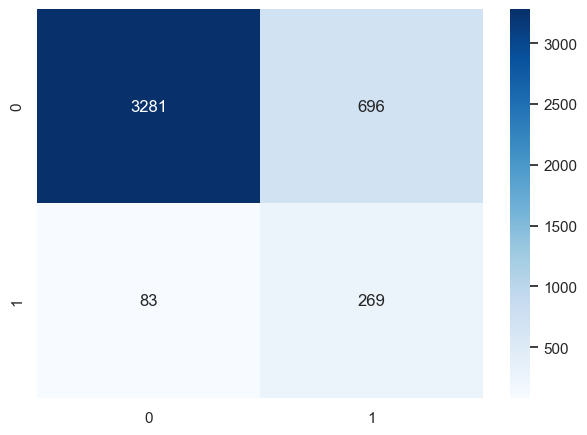

In [1374]:
y_pred_svm = final_pipeline_svm.predict(X_val)
print(classification_report(y_val, y_pred_svm))
svm_auc = roc_auc_score(y_val,y_pred_svm)
print('The auc of the model is:',svm_auc)
# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_val, y_pred_svm), annot=True, fmt='d', cmap='Blues');

### Support Vector Machine with grid searchcv

In [1375]:
%%time
params = {'model_svm__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
          'model_svm__C': [0.1, 1, 10, 100, 1000],
          'model_svm__kernel':["rbf"]}

# define grid search
grid_search_svm = GridSearchCV(final_pipeline_svm, param_grid=params, n_jobs=-1, cv=5, scoring='accuracy',error_score=0)
grid_result_svm = grid_search_svm.fit(X_train,y_train)

CPU times: total: 6min 33s
Wall time: 1h 37min 8s


Best Parameters : {'model_svm__C': 10, 'model_svm__gamma': 0.01, 'model_svm__kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      3977
           1       0.00      0.00      0.00       352

    accuracy                           0.92      4329
   macro avg       0.46      0.50      0.48      4329
weighted avg       0.84      0.92      0.88      4329

The roc of the xg model is:  0.806
F1-score of xg model is:  0.425


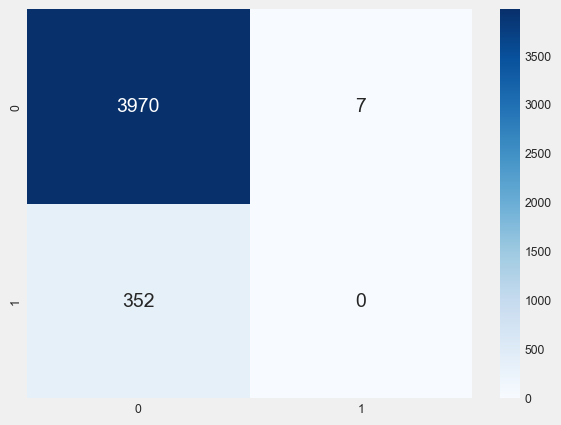

In [1514]:
best_parameters_svm = grid_result_svm.best_params_
print("Best Parameters :",best_parameters_svm)
best_est_svm = grid_result_svm.best_estimator_
y_pred_svm = best_est_svm.predict(X_val)
print(classification_report(y_val, y_pred_svm))

# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_val, y_pred_svm), annot=True, fmt='d', cmap='Blues');

roc_xg = roc_auc_score(y_test,y_pred_prob_xg_final[:, 1])
print('The roc of the xg model is: ',np.round(roc_xg,3))
f1_xg = f1_score(y_test, y_pred_xg_final)
print('F1-score of xg model is: ',np.round(f1_xg,3))

### Final Prediction with Support Vector Machine

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      4128
           1       0.14      0.00      0.01       365

    accuracy                           0.92      4493
   macro avg       0.53      0.50      0.48      4493
weighted avg       0.86      0.92      0.88      4493

The accuracy of the model is: 0.5006431188276522


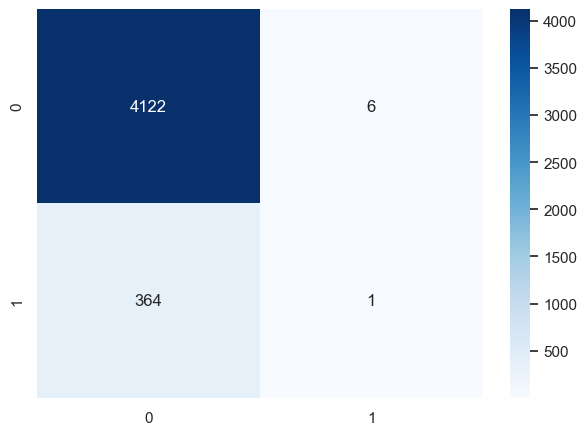

In [1379]:
y_pred_svm_final = best_est_svm.predict(X_test)
print(classification_report(y_test, y_pred_svm_final))

# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_svm_final), annot=True, fmt='d', cmap='Blues');

#since this dataset is completely imbalanced so we will get accuracy by roc_auc_score
print('The accuracy of the model is:',roc_auc_score(y_test,y_pred_svm_final))

In [1465]:
# Make grid search summary table
svm_model_stats = pd.DataFrame(grid_result_svm.cv_results_)
svm_model_stats = svm_model_stats.sort_values(by='rank_test_score', ascending=False).reset_index()

# 7. Deep Learning Model
 [Table of contents](#Table-of-Contents)

### 7.1 Multilayer perceptron model

In [1422]:
%%time
final_pipeline_mlp = Pipeline(steps=[
                                    ('prep_trans',prep_trans),  
                                    ('dim reduction',PCA(n_components=10,svd_solver='randomized', random_state=42)),
                                    ('roc',RandomOverSampler(random_state=42)),
                                    ('model_mlp', Sequential([Dense(64, activation='relu', input_dim=10),
                                                              Dropout(0.5),
                                                              Dense(40, activation='relu'),                                                              
                                                              Dropout(0.5),
                                                              Dense(8, activation='relu'),                                                              
                                                              Dropout(0.5),
                                                              Dense(1, activation='sigmoid')])) # Deep learning model
                                     ])
# Compile the model
final_pipeline_mlp['model_mlp'].compile(optimizer='adam', loss='binary_crossentropy', metrics=[Precision(), AUC(name='roc_auc')])
final_pipeline_mlp.fit(X_train,y_train,model_mlp__epochs=80, model_mlp__batch_size=1000)

Epoch 1/80
39/39 [==============================] - 1s 3ms/step - loss: 126.0135 - precision_4: 0.5161 - roc_auc: 0.5248
Epoch 2/80
39/39 [==============================] - 0s 2ms/step - loss: 27.9214 - precision_4: 0.5141 - roc_auc: 0.5380
Epoch 3/80
39/39 [==============================] - 0s 2ms/step - loss: 10.0950 - precision_4: 0.5090 - roc_auc: 0.5308
Epoch 4/80
39/39 [==============================] - 0s 2ms/step - loss: 5.7936 - precision_4: 0.5078 - roc_auc: 0.5238
Epoch 5/80
39/39 [==============================] - 0s 2ms/step - loss: 3.6514 - precision_4: 0.5070 - roc_auc: 0.5200
Epoch 6/80
39/39 [==============================] - 0s 2ms/step - loss: 2.9724 - precision_4: 0.5057 - roc_auc: 0.5168
Epoch 7/80
39/39 [==============================] - 0s 3ms/step - loss: 2.3981 - precision_4: 0.5033 - roc_auc: 0.5077
Epoch 8/80
39/39 [==============================] - 0s 2ms/step - loss: 1.9695 - precision_4: 0.5024 - roc_auc: 0.5061
Epoch 9/80
39/39 [==========================

Pipeline(steps=[('prep_trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('te',
                                                                   TargetEncoder(handle_unknown='ignore'))]),
                                                  ['day_of_last_rech_data_6',
                                                   'day_of_last_rech_data_7',
                                                   'day_of_last_rech_data_8',
                                                   'day_of_last_rech_6',
                                                   'day_of_last_rech_7',
                                                   'day_of_l...
                                                                   StandardScaler())]),
                                                  ['loc_og_t2o_mou',
                                                   'std_og_t2o_mou',
                                                   'loc_ic_t2o_mou',
                                                   'std_og_t2c_mou_6',
                                                   'std_og_t2c_mou_7',
                                                   'std_og_t2c_mou_8',
                                                   'fb_user_6', 'fb_user_7',
                                                   'fb_user_8'])])),
                ('dim reduction',
                 PCA(n_components=10, random_state=42,
                     svd_solver='randomized')),
                ('roc', RandomOverSampler(random_state=42)),
                ('model_mlp',
                 <keras.engine.sequential.Sequential object at 0x0000024C12CEAB90>)])

In [1459]:
%%time
final_pipeline_mlp = Pipeline(steps=[
                                    ('prep_trans',prep_trans),  
                                    ('dim reduction',PCA(n_components=10,svd_solver='randomized', random_state=42)),
                                    ('roc',RandomOverSampler(random_state=42)),
                                    ('model_mlp', Sequential([Dense(64, activation='relu', input_dim=10),
                                                              Dropout(0.5),
                                                              Dense(8, activation='relu'),
                                                              Dropout(0.5),
                                                              Dense(1, activation='sigmoid')])) # Deep learning model
                                     ])

# Compile the model
final_pipeline_mlp['model_mlp'].compile(optimizer='adam', loss='binary_crossentropy', metrics=[Precision(), AUC(name='roc_auc')])
final_pipeline_mlp.fit(X_train,y_train,model_mlp__epochs=200, model_mlp__batch_size=600)

Epoch 1/200
65/65 [==============================] - 1s 1ms/step - loss: 88.7330 - precision_10: 0.5360 - roc_auc: 0.5603
Epoch 2/200
65/65 [==============================] - 0s 1ms/step - loss: 16.3877 - precision_10: 0.5272 - roc_auc: 0.5455
Epoch 3/200
65/65 [==============================] - 0s 2ms/step - loss: 6.1134 - precision_10: 0.5146 - roc_auc: 0.5307
Epoch 4/200
65/65 [==============================] - 0s 2ms/step - loss: 3.6804 - precision_10: 0.5174 - roc_auc: 0.5211
Epoch 5/200
65/65 [==============================] - 0s 2ms/step - loss: 2.1699 - precision_10: 0.5291 - roc_auc: 0.5166
Epoch 6/200
65/65 [==============================] - 0s 1ms/step - loss: 1.8204 - precision_10: 0.5147 - roc_auc: 0.5125
Epoch 7/200
65/65 [==============================] - 0s 1ms/step - loss: 1.4686 - precision_10: 0.5271 - roc_auc: 0.5095
Epoch 8/200
65/65 [==============================] - 0s 1ms/step - loss: 1.3354 - precision_10: 0.5250 - roc_auc: 0.5089
Epoch 9/200
65/65 [===========

Pipeline(steps=[('prep_trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('te',
                                                                   TargetEncoder(handle_unknown='ignore'))]),
                                                  ['day_of_last_rech_data_6',
                                                   'day_of_last_rech_data_7',
                                                   'day_of_last_rech_data_8',
                                                   'day_of_last_rech_6',
                                                   'day_of_last_rech_7',
                                                   'day_of_l...
                                                                   StandardScaler())]),
                                                  ['loc_og_t2o_mou',
                                                   'std_og_t2o_mou',
                                                   'loc_ic_t2o_mou',
                                                   'std_og_t2c_mou_6',
                                                   'std_og_t2c_mou_7',
                                                   'std_og_t2c_mou_8',
                                                   'fb_user_6', 'fb_user_7',
                                                   'fb_user_8'])])),
                ('dim reduction',
                 PCA(n_components=10, random_state=42,
                     svd_solver='randomized')),
                ('roc', RandomOverSampler(random_state=42)),
                ('model_mlp',
                 <keras.engine.sequential.Sequential object at 0x0000024CC44673A0>)])

In [1460]:

# Apply data preprocessing to validation and test sets
X_val_processed = final_pipeline_mlp['prep_trans'].transform(X_val)
X_test_processed = final_pipeline_mlp['prep_trans'].transform(X_test)

# Apply PCA to validation and test sets
X_val_pca = final_pipeline_mlp['dim reduction'].transform(X_val_processed)
X_test_pca = final_pipeline_mlp['dim reduction'].transform(X_test_processed)

# Evaluate the model on validation and test sets
val_scores = final_pipeline_mlp['model_mlp'].evaluate(X_val_pca, y_val, verbose=0)
test_scores = final_pipeline_mlp['model_mlp'].evaluate(X_test_pca, y_test, verbose=0)

print("Validation Loss:", np.round(val_scores[0],2))
print("Validation Precision:", np.round(val_scores[1],2))
print("Validation ROC AUC:", np.round(val_scores[2],2))

print("Test Loss:", np.round(test_scores[0],2))
print("Test Precision:", np.round(test_scores[1],2))
print("Test ROC AUC:", np.round(test_scores[2],2))

Validation Loss: 0.54
Validation Precision: 0.2
Validation ROC AUC: 0.82
Test Loss: 0.55
Test Precision: 0.19
Test ROC AUC: 0.79


141/141 [==============================] - 0s 584us/step


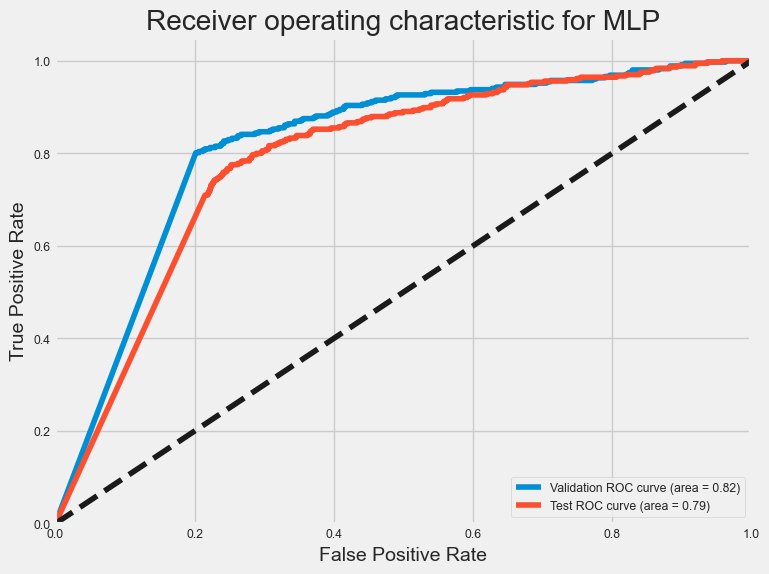

In [1461]:
# Apply data preprocessing to validation and test sets
X_val_processed1 = final_pipeline_mlp['prep_trans'].transform(X_val)
X_test_processed1 = final_pipeline_mlp['prep_trans'].transform(X_test)

# Apply PCA to validation and test sets
X_val_pca1 = final_pipeline_mlp['dim reduction'].transform(X_val_processed1)
X_test_pca1 = final_pipeline_mlp['dim reduction'].transform(X_test_processed1)

# Get predicted probabilities for validation and test sets
val_y_pred_prob1 = final_pipeline_mlp['model_mlp'].predict(X_val_pca1)
test_y_pred_prob1 = final_pipeline_mlp['model_mlp'].predict(X_test_pca1)

# Use probability of positive class as predicted probability
val_y_pred_prob1 = val_y_pred_prob1[:, 0]
test_y_pred_prob1 = test_y_pred_prob1[:, 0]

# Compute false positive rate, true positive rate, and threshold for validation and test sets
val_fpr1, val_tpr1, val_thresholds1 = roc_curve(y_val, val_y_pred_prob1)
test_fpr1, test_tpr1, test_thresholds1 = roc_curve(y_test, test_y_pred_prob1)

# Compute AUC for validation and test sets
val_auc1 = auc(val_fpr1, val_tpr1)
test_auc1 = auc(test_fpr1, test_tpr1)

# Plot ROC curve for validation and test sets
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(val_fpr1, val_tpr1, label='Validation ROC curve (area = %0.2f)' % val_auc1)
plt.plot(test_fpr1, test_tpr1, label='Test ROC curve (area = %0.2f)' % test_auc1)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for MLP')
plt.legend(loc="lower right")
plt.show()

### 7.2 KerasClassifier with gridsearchcv

In [146]:
# create a custome function to train and compile MLP model
def cust_model_keras(activation='relu',optimizer='adam',dropout_rate=20):
    # Define the models
    model = Sequential()    
    model.add(Dense(64, activation=activation, input_dim=10))
    model.add(Dropout(dropout_rate))    
    model.add(Dense(50, activation=activation))
    model.add(Dropout(dropout_rate))   
    model.add(Dense(1, activation='sigmoid'))    
    # compile the keras model
    model.compile(loss='binary_crossentropy', optimizer= optimizer , metrics=['accuracy'])
    return model

In [147]:
%%time
final_pipeline_keras = Pipeline(steps=[
                                    ('prep_trans',prep_trans),  
                                    ('dim reduction',PCA(n_components=10,svd_solver='randomized', random_state=42)),
                                    ('roc',RandomOverSampler(random_state=42)),
                                    ('model_keras', KerasClassifier(build_fn=cust_model_keras))
                                     ])

# Hyper Parameter Tuning
parameters = {       
        'model_keras__epochs':[20, 30],
        'model_keras__dropout_rate': [0.2, 0.5, 0.8],
        'model_keras__activation' :  ['relu', 'tanh'],
        'model_keras__batch_size' : [32, 600, 1000]
            }
grid_search_keras = GridSearchCV(final_pipeline_keras, parameters, cv=2, scoring='f1', verbose=1)

# Train grid search
grid_result_keras = grid_search_keras.fit(X_train, y_train)

Fitting 2 folds for each of 36 candidates, totalling 72 fits
Epoch 1/20
607/607 [==============================] - 3s 973us/step - loss: 22.2694 - accuracy: 0.6589
Epoch 2/20
607/607 [==============================] - 1s 1ms/step - loss: 2.8754 - accuracy: 0.6628
Epoch 3/20
607/607 [==============================] - 1s 1ms/step - loss: 0.9661 - accuracy: 0.6953
Epoch 4/20
607/607 [==============================] - 1s 993us/step - loss: 0.6702 - accuracy: 0.7107
Epoch 5/20
607/607 [==============================] - 1s 918us/step - loss: 0.6831 - accuracy: 0.7218
Epoch 6/20
607/607 [==============================] - 1s 888us/step - loss: 0.5870 - accuracy: 0.7307
Epoch 7/20
607/607 [==============================] - 1s 972us/step - loss: 0.5761 - accuracy: 0.7383
Epoch 8/20
607/607 [==============================] - 1s 1ms/step - loss: 0.5554 - accuracy: 0.7403
Epoch 9/20
607/607 [==============================] - 1s 892us/step - loss: 0.5399 - accuracy: 0.7496
Epoch 10/20
607/607 [=====

In [151]:
# Make grid search summary table
model_keras_stats = pd.DataFrame(grid_result_keras.cv_results_)
model_keras_stats = model_keras_stats.sort_values(by='rank_test_score', ascending=False).reset_index()

# Refit and Predict on test data
best_est_keras = grid_result_keras.best_estimator_
print(classification_report(y_test, best_est_keras.predict(X_test)))

f1_val_score = round(f1_score(y_val, best_est_keras.predict(X_val)), 2)
f1_test_score = round(f1_score(y_test, best_est_keras.predict(X_test)), 2)
print('F1 Score of keras for val-set:' , f1_val_score) 
print('F1 Score of keras for test set:' , f1_test_score)
# Compute the ROC AUC score for the test data
roc_keras_t = roc_auc_score(y_test, best_est_keras.predict(X_test))
print('ROC AUC score on test data:',round(roc_keras_t,2))

141/141 [==============================] - 0s 791us/step
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      4128
           1       0.32      0.62      0.42       365

    accuracy                           0.86      4493
   macro avg       0.64      0.75      0.67      4493
weighted avg       0.91      0.86      0.88      4493

141/141 [==============================] - 0s 691us/step
F1 Score of keras for val-set: 0.45
F1 Score of keras for test set: 0.42
141/141 [==============================] - 0s 684us/step
ROC AUC score on test data: 0.75


### 7.3 RNN Model

In [152]:
%%time
## Tuned sequential model
final_pipeline_lstm = Pipeline(steps=[
                                    ('prep_trans',prep_trans),  
                                    ('dim reduction',PCA(n_components=10,svd_solver='randomized', random_state=42)),
                                    ('roc',RandomOverSampler(random_state=42)),
                                    ('model_lstm', Sequential([Reshape((1, -1)),
                                                            LSTM(64, activation='relu', return_sequences=True),
                                                            
                                                              Dropout(0.5),
                                                              Dense(8, activation='relu'),
                                                              Dropout(0.5),
                                                              Dense(1, activation='sigmoid')])) # Deep learning model
                                     ])

# Compile the model
final_pipeline_lstm['model_lstm'].compile(optimizer='adam', loss='binary_crossentropy', metrics=[Precision(), AUC(name='roc_auc')])
final_pipeline_lstm.fit(X_train,y_train,model_lstm__epochs=65, model_lstm__batch_size=600)

Epoch 1/65
65/65 [==============================] - 2s 4ms/step - loss: 5.3681 - precision: 0.5501 - roc_auc: 0.5610
Epoch 2/65
65/65 [==============================] - 0s 3ms/step - loss: 3.9277 - precision: 0.5946 - roc_auc: 0.6149
Epoch 3/65
65/65 [==============================] - 0s 3ms/step - loss: 2.8956 - precision: 0.6006 - roc_auc: 0.6305
Epoch 4/65
65/65 [==============================] - 0s 3ms/step - loss: 2.0701 - precision: 0.5621 - roc_auc: 0.6218
Epoch 5/65
65/65 [==============================] - 0s 3ms/step - loss: 1.6060 - precision: 0.5570 - roc_auc: 0.6149
Epoch 6/65
65/65 [==============================] - 0s 3ms/step - loss: 1.3226 - precision: 0.5521 - roc_auc: 0.6082
Epoch 7/65
65/65 [==============================] - 0s 3ms/step - loss: 1.1222 - precision: 0.5484 - roc_auc: 0.6036
Epoch 8/65
65/65 [==============================] - 0s 3ms/step - loss: 1.0128 - precision: 0.5459 - roc_auc: 0.6038
Epoch 9/65
65/65 [==============================] - 0s 4ms/step 

Pipeline(steps=[('prep_trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('te',
                                                                   TargetEncoder(handle_unknown='ignore'))]),
                                                  ['day_of_last_rech_data_6',
                                                   'day_of_last_rech_data_7',
                                                   'day_of_last_rech_data_8',
                                                   'day_of_last_rech_6',
                                                   'day_of_last_rech_7',
                                                   'day_of_l...
                                                  ['loc_og_t2o_mou',
                                                   'std_og_t2o_mou',
                                                   'loc_ic_t2o_mou',
                                                   'std_og_t2c_mou_6',
                                                   'std_og_t2c_mou_7',
                                                   'std_og_t2c_mou_8',
                                                   'fb_user_6', 'fb_user_7',
                                                   'fb_user_8'])])),
                ('dim reduction',
                 PCA(n_components=10, random_state=42,
                     svd_solver='randomized')),
                ('roc', RandomOverSampler(random_state=42)),
                ('model_lstm',
                 <keras.engine.sequential.Sequential object at 0x00000215AD920790>)])

In [153]:
# Apply data preprocessing to validation and test sets
X_val_processed = final_pipeline_lstm['prep_trans'].transform(X_val)
X_test_processed = final_pipeline_lstm['prep_trans'].transform(X_test)

# Apply PCA to validation and test sets
X_val_pca = final_pipeline_lstm['dim reduction'].transform(X_val_processed)
X_test_pca = final_pipeline_lstm['dim reduction'].transform(X_test_processed)

# Evaluate the model on validation and test sets
val_scores = final_pipeline_lstm['model_lstm'].evaluate(X_val_pca, y_val, verbose=0)
test_scores = final_pipeline_lstm['model_lstm'].evaluate(X_test_pca, y_test, verbose=0)

print("Validation Loss:", np.round(val_scores[0],2))
print("Validation Precision:", np.round(val_scores[1],2))
print("Validation ROC AUC:", np.round(val_scores[2],2))

print("Test Loss:", np.round(test_scores[0],2))
print("Test Precision:", np.round(test_scores[1],2))
print("Test ROC AUC:", np.round(test_scores[2],2))

Validation Loss: 0.58
Validation Precision: 0.24
Validation ROC AUC: 0.83
Test Loss: 0.57
Test Precision: 0.23
Test ROC AUC: 0.82


141/141 [==============================] - 0s 727us/step


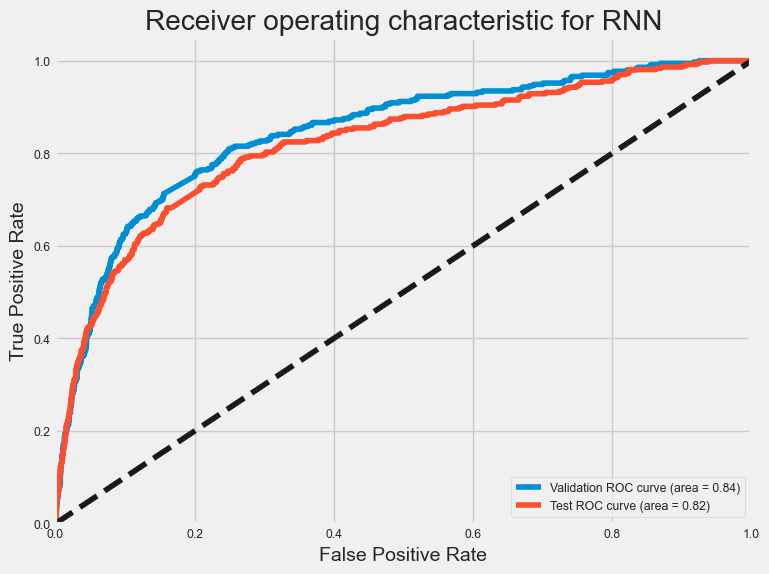

In [1456]:
# Apply data preprocessing to validation and test sets
X_val_processed = final_pipeline_lstm['prep_trans'].transform(X_val)
X_test_processed = final_pipeline_lstm['prep_trans'].transform(X_test)

# Apply PCA to validation and test sets
X_val_pca = final_pipeline_lstm['dim reduction'].transform(X_val_processed)
X_test_pca = final_pipeline_lstm['dim reduction'].transform(X_test_processed)

# Get predicted probabilities for validation and test sets
val_y_pred_prob = final_pipeline_lstm['model_lstm'].predict(X_val_pca)
test_y_pred_prob = final_pipeline_lstm['model_lstm'].predict(X_test_pca)

# Use probability of positive class as predicted probability
val_y_pred_prob = val_y_pred_prob[:, 0]
test_y_pred_prob = test_y_pred_prob[:, 0]

# Compute false positive rate, true positive rate, and threshold for validation and test sets
val_fpr, val_tpr, val_thresholds = roc_curve(y_val, val_y_pred_prob)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_y_pred_prob)

# Compute AUC for validation and test sets
val_auc = auc(val_fpr, val_tpr)
test_auc = auc(test_fpr, test_tpr)

# Plot ROC curve for validation and test sets
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(val_fpr, val_tpr, label='Validation ROC curve (area = %0.2f)' % val_auc)
plt.plot(test_fpr, test_tpr, label='Test ROC curve (area = %0.2f)' % test_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for RNN')
plt.legend(loc="lower right")
plt.show()

# 8. Ensemble Model : Stacking
 [Table of contents](#Table-of-Contents)

In [155]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB 
estimators = [
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('knn2', KNeighborsClassifier(n_neighbors=7)),
    ('svc', SVC(C=10,gamma = 0.01)),#best features from gridsearchcv
    ('svc2', SVC(gamma=0.01)), 
    ('lr', LogisticRegression(C=0.001,solver= 'lbfgs')), # best parameters from gridsearchcv
    ('lr2', LogisticRegression(max_iter=100,penalty='l2'),
    ('Naive Bayes',GaussianNB()))
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

In [156]:
final_pipeline_stack = Pipeline(steps=[
                                    ('prep_trans',prep_trans),                                    
                                    ('dim reduction',PCA(n_components=10,svd_solver='randomized', random_state=42)),
                                    ('smote',SMOTE(random_state=42)),
                                    ('model_stack', clf)
                                     ])

In [157]:
%%time
final_pipeline_stack.fit(X_train,y_train)

CPU times: total: 52min 15s
Wall time: 57min 29s


Pipeline(steps=[('prep_trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('te',
                                                                   TargetEncoder(handle_unknown='ignore'))]),
                                                  ['day_of_last_rech_data_6',
                                                   'day_of_last_rech_data_7',
                                                   'day_of_last_rech_data_8',
                                                   'day_of_last_rech_6',
                                                   'day_of_last_rech_7',
                                                   'day_of_l...
                     svd_solver='randomized')),
                ('smote', SMOTE(random_state=42)),
                ('model_stack',
                 StackingClassifier(estimators=[('knn', KNeighborsClassifier()),
                                                ('knn2',
                                                 KNeighborsClassifier(n_neighbors=7)),
                                                ('svc', SVC(C=10, gamma=0.01)),
                                                ('svc2', SVC(gamma=0.01)),
                                                ('lr',
                                                 LogisticRegression(C=0.001)),
                                                ('lr2', LogisticRegression(),
                                                 ('Naive Bayes',
                                                  GaussianNB()))],
                                    final_estimator=LogisticRegression()))])

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      3977
           1       0.28      0.44      0.34       352

    accuracy                           0.86      4329
   macro avg       0.61      0.67      0.63      4329
weighted avg       0.89      0.86      0.87      4329

The accuracy of the model is: 0.7827408165131322


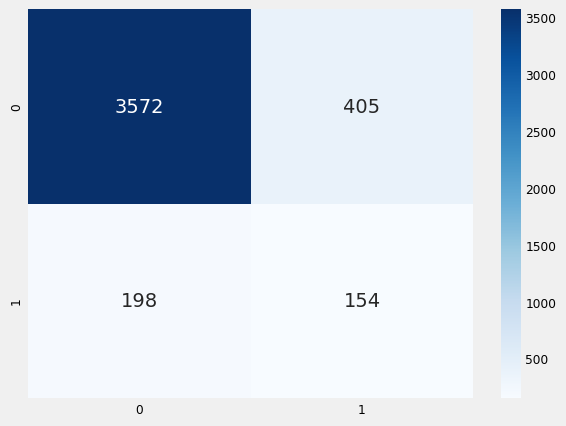

In [158]:
y_pred_stack = final_pipeline_stack.predict(X_val)
print(classification_report(y_val, y_pred_stack))
y_pred_prob_stack = final_pipeline_stack.predict_proba(X_val)

# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_val, y_pred_stack), annot=True, fmt='d', cmap='Blues');
#since this dataset is completely imbalanced so we will get accuracy by roc_auc_score
print('The accuracy of the model is:',roc_auc_score(y_val,y_pred_prob_stack[:,1]))

stack_fpr_val, stack_tpr_val, stack_thresholds_test = roc_curve(y_val, y_pred_prob_stack[:,1])
stack_roc_val= auc(stack_fpr_val, stack_tpr_val)

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      4128
           1       0.23      0.40      0.29       365

    accuracy                           0.84      4493
   macro avg       0.59      0.64      0.60      4493
weighted avg       0.89      0.84      0.86      4493

The accuracy of the model is: 0.774643596686843


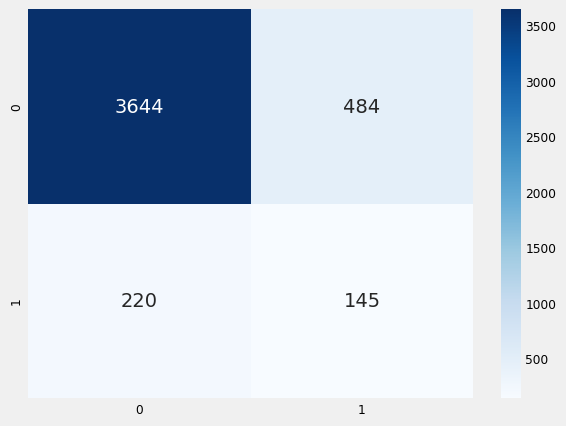

In [159]:
y_pred_stack = final_pipeline_stack.predict(X_test)
print(classification_report(y_test, y_pred_stack))
y_pred_prob_stack_final = final_pipeline_stack.predict_proba(X_test)

# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_stack), annot=True, fmt='d', cmap='Blues');
#since this dataset is completely imbalanced so we will get accuracy by roc_auc_score
print('The accuracy of the model is:',roc_auc_score(y_test,y_pred_prob_stack_final[:,1]))

stack_fpr_test, stack_tpr_test, stack_thresholds_test = roc_curve(y_test, y_pred_prob_stack_final[:,1])
stack_roc_test= auc(stack_fpr_test, stack_tpr_test)

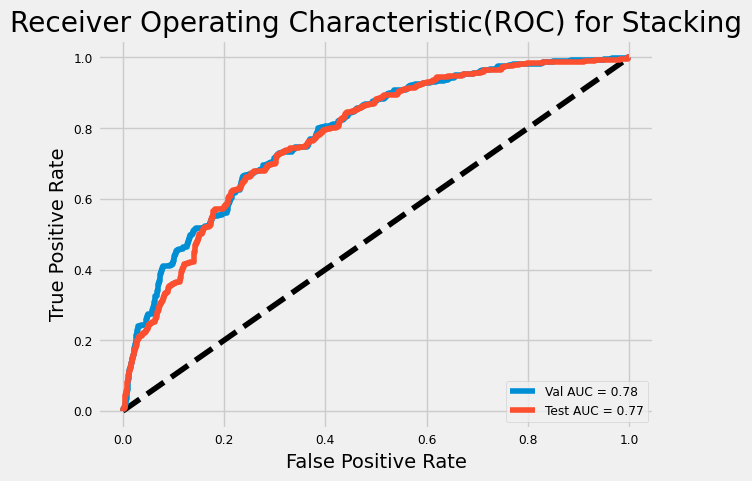

In [160]:
### Plotting the roc curve
plt.plot([0, 1], [0, 1], 'k--')  # plot the diagonal line
plt.plot(stack_fpr_val,stack_tpr_val, label='Val AUC = {:.2f}'.format(stack_roc_val))
plt.plot(stack_fpr_test, stack_tpr_test, label='Test AUC = {:.2f}'.format(stack_roc_test))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(ROC) for Stacking')
plt.legend(loc='lower right')
plt.show()

# 9. Model Selection
[Table of contents](#Table-of-Contents)

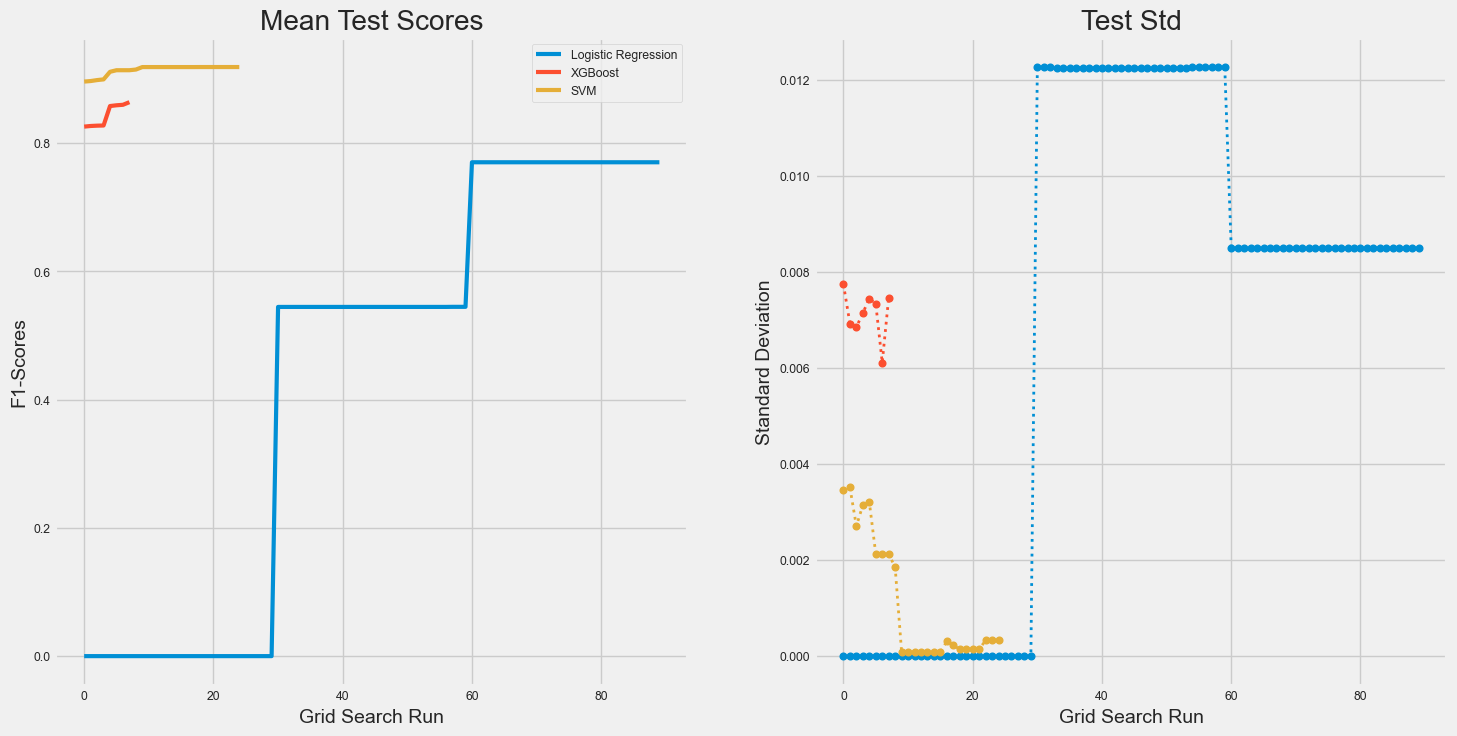

In [1466]:
plt.figure(figsize=(16,8))

# Test Scores Plot
plt.subplot(1,2,1)
pd.Series(lr_model_stats['mean_test_score']).plot(kind='line', lw=3,label = 'Logistic Regression');
pd.Series(xg_model_stats['mean_test_score']).plot(kind='line', lw=3,label = 'XGBoost');
pd.Series(svm_model_stats['mean_test_score']).plot(kind='line', lw=3,label = 'SVM');
pd.Series(rcf_model_stats['mean_test_score']).plot(kind='line', lw=3,label = 'Random Forest Classifier');
pd.Series(model_keras_stats['mean_test_score']).plot(kind='line', lw=3,label = 'Keras Classifier');

plt.title('Mean Test Scores')
plt.xlabel('Grid Search Run')
plt.ylabel('F1-Scores')
plt.legend()

# Test Scores Standard Deviation Plot
plt.subplot(1,2,2)
pd.Series(lr_model_stats['std_test_score']).plot(kind='line', lw=2, ls=':', marker='o', label = 'Logistic Regression');
pd.Series(xg_model_stats['std_test_score']).plot(kind='line', lw=2, ls=':', marker='o',label = 'XGBoost');
pd.Series(svm_model_stats['std_test_score']).plot(kind='line', lw=2, ls=':', marker='o',label = 'SVM');
pd.Series(rcf_model_stats['std_test_score']).plot(kind='line', lw=2, ls=':', marker='o',label = 'Random Forest Classifier');
pd.Series(model_keras_stats['std_test_score']).plot(kind='line', lw=2, ls=':', marker='o',label = 'Keras Classifier');
plt.title('Test Std')
plt.xlabel('Grid Search Run')
plt.ylabel('Standard Deviation')
plt.tight_layout;

###  PCA parameter tuning

In [1488]:
components = [2, 5, 10, 15, 20, 30,40,50, 60, 70]
scores_val = []
scores_test = []
variances = []
cumulative_variances = [] # to plot cumulative variance

for n in components:
    final_pipeline_rfcp = Pipeline(steps=[
        ('prep_trans', prep_trans),  
        ('dim reduction', PCA(n_components=n, svd_solver='randomized', random_state=42)),
        ('smote', SMOTE(random_state=42)),
        ('model_rfcp', RandomForestClassifier())
    ])
    final_pipeline_rfcp.fit(X_train, y_train)
    scores_val.append(final_pipeline_rfcp.score(X_val, y_val))
    scores_test.append(final_pipeline_rfcp.score(X_test, y_test))
    variances.append(final_pipeline_rfcp.named_steps['dim reduction'].explained_variance_ratio_)
    cumulative_variances.append(sum(final_pipeline_rfcp.named_steps['dim reduction'].explained_variance_ratio_)) #apply sum to get the explained_variance_ratio_.cumsum()

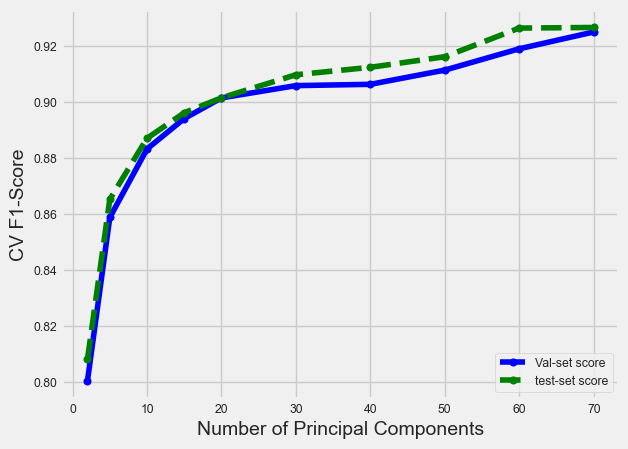

In [1490]:
#Plot the scores of PCA with different values
plt.figure()
plt.plot(components, scores_val, marker='o',color='blue',label="Val-set score")
plt.plot(components,scores_test, marker = 'o',color='green',linestyle='--' ,label="test-set score")
plt.xlabel('Number of Principal Components')
plt.ylabel('CV F1-Score')

plt.legend(loc='lower right');

### Variability Explained by PCA

<b>Variance in the dataset:</b> It is the measure of spread or variability of the data points around the mean. A high variance indicates that the data points are more spread out, while a low variance indicates that the data points are more clustered around the mean.

<b>PCA:</b> brings out strong patterns in a dataset (dimensionality reduction).

<b>Task:</b>

<i>Find the number of principal components that explains the variability of the dataset.</i> 

>By selecting a sufficient number of principal components, we can retain most of the variance in the data while reducing the dimensionality of the dataset.

<b>Importance:<b>

>This can help to improve the computational efficiency of many machine learning algorithms.

>It reduces the risk of overfitting.


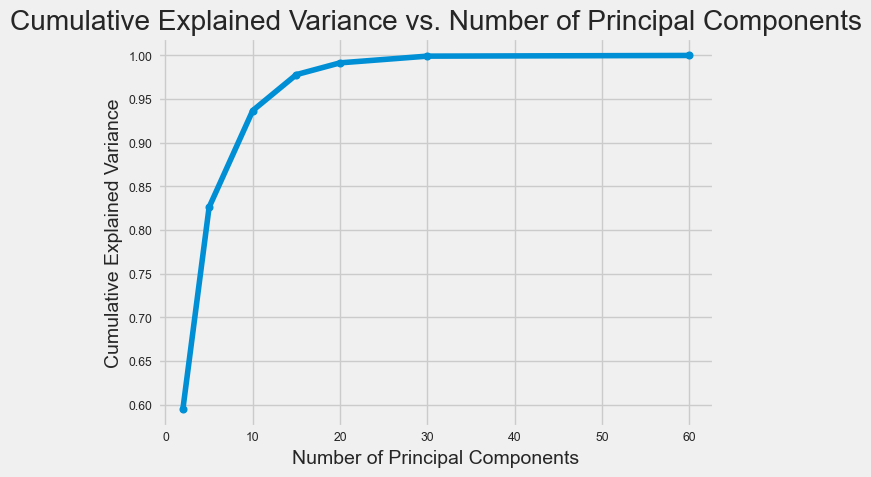

In [1485]:
#Plot explained variance
plt.figure();
plt.bar(components, variances)
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance');
# Plot the cumulative explained variance
plt.plot(components, cumulative_variances, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance vs. Number of Principal Components")
plt.show()

>The 1st PC captures the most variation in the data.

>The 2nd PC captures the second most variation in the data and so on.

# 10. Model Interpretation
[Table of contents](#Table-of-Contents)

## Global Interpretation :
## 10.1 Permutation Feature Importance

### 10.1.1 Logistic Regression

1. vol_3g_mb_7: 0.0251
2. vol_3g_mb_6: 0.0138
3. total_rech_amt_data_6: 0.0109
4. aon: 0.0057
5. total_rech_amt_data_7: 0.0050
6. change_in_std_og_mou: 0.0010
7. change_in_total_og_mou: 0.0010
8. vol_2g_mb_6: 0.0004
9. change_in_last_day_rch_amt: 0.0004
10. change_in_std_og_t2t_mou: 0.0002


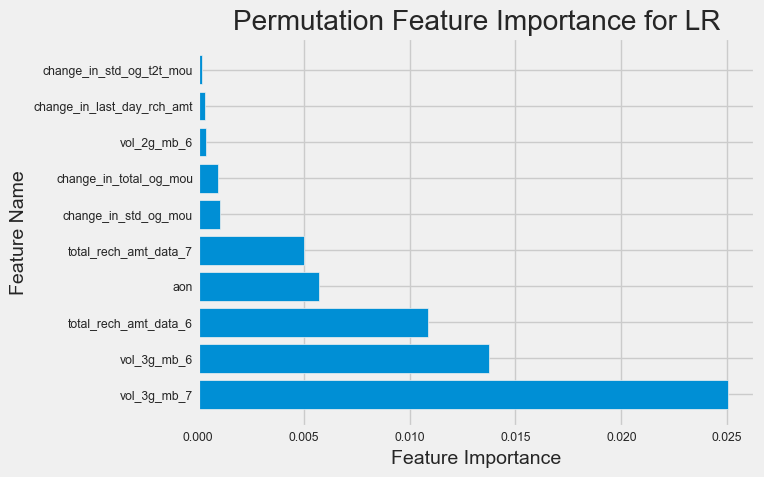

In [1504]:
# compute permutation feature importance for Logistic Regression
result = permutation_importance(grid_result_lr, X_test, y_test, n_repeats=20, random_state=42)
# get feature importance scores
importance_scores = result.importances_mean
# get feature names
feature_names = list(X_train.columns)
# sort features by importance score in descending order and take only top 10 features
sorted_idx = importance_scores.argsort()[::-1][:10]
sorted_feature_names = [feature_names[idx] for idx in sorted_idx]
sorted_importance_scores = importance_scores[sorted_idx]
# print sorted feature names and importance scores
for i in range(len(sorted_idx)):
    print(f"{i+1}. {sorted_feature_names[i]}: {sorted_importance_scores[i]:.4f}")
import matplotlib.pyplot as plt

# plot sorted feature names and importance scores
plt.barh(sorted_feature_names, sorted_importance_scores)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Permutation Feature Importance for LR')
plt.show()

### 10.1.2 eXtreme Gradient Boosting

In [ ]:
# compute permutation feature importance for Logistic Regression
result = permutation_importance(grid_result_xg, X_test, y_test, n_repeats=20, random_state=42)
# get feature importance scores
importance_scores = result.importances_mean
# get feature names
feature_names = list(X_train.columns)
# sort features by importance score in descending order and take only top 10 features
sorted_idx = importance_scores.argsort()[::-1][:10]
sorted_feature_names = [feature_names[idx] for idx in sorted_idx]
sorted_importance_scores = importance_scores[sorted_idx]
# print sorted feature names and importance scores
for i in range(len(sorted_idx)):
    print(f"{i+1}. {sorted_feature_names[i]}: {sorted_importance_scores[i]:.4f}")
import matplotlib.pyplot as plt

# plot sorted feature names and importance scores
plt.barh(sorted_feature_names, sorted_importance_scores)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Permutation Feature Importance for XBG')
plt.show()

### 10.1.3 Random Forest Model

1. vol_3g_mb_8: 0.0490
2. total_rech_amt_data_8: 0.0489
3. change_in_total_rech_amt: 0.0385
4. total_rech_amt_data_6: 0.0299
5. total_avg_rech_amnt_6_7: 0.0291
6. change_in_arpu: 0.0199
7. change_in_vbc_3g: 0.0141
8. aon: 0.0128
9. aug_vbc_3g: 0.0081
10. total_rech_amt_data_7: 0.0068


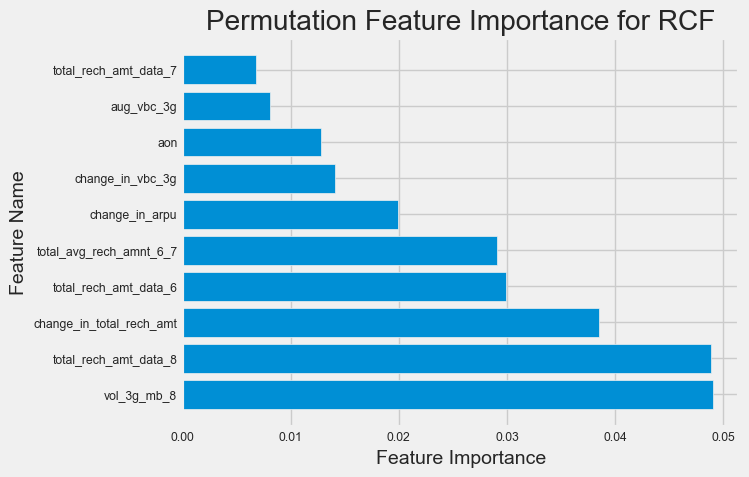

In [1505]:
# compute permutation feature importance for Random Forest
result = permutation_importance(grid_result_rfc, X_test, y_test, n_repeats=10, random_state=42)
# get feature importance scores
importance_scores = result.importances_mean
# get feature names
feature_names = list(X_train.columns)
# sort features by importance score in descending order and take only top 10 features
sorted_idx = importance_scores.argsort()[::-1][:10]
sorted_feature_names = [feature_names[idx] for idx in sorted_idx]
sorted_importance_scores = importance_scores[sorted_idx]
# print sorted feature names and importance scores
for i in range(len(sorted_idx)):
    print(f"{i+1}. {sorted_feature_names[i]}: {sorted_importance_scores[i]:.4f}")
import matplotlib.pyplot as plt

# plot sorted feature names and importance scores
plt.barh(sorted_feature_names, sorted_importance_scores)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Permutation Feature Importance for RCF')
plt.show()

## 10.2 Local Interpretation with Lime

### Retrain the model for model interpretation

In [147]:
X=df.drop(['churn'],axis=1)
y=df['churn']
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42,stratify=y)

In [222]:
cat_missing_cols= X_train.select_dtypes(exclude=['int', 'float'] ).columns.tolist()
# numeric columns with outliers
num_outlier_cols = find_outliers(X_train)
# rest of the numeric columns
set1 = set(num_outlier_cols)
set2 = set(num_columns)
numeric_cols = list(set1.symmetric_difference(set2))

In [227]:
# Pipeline to handle outliers  in numerical columns
outlier_pipe = Pipeline(steps=[('out_pipe',FunctionTransformer(func=handle_outliers)),
                              ('scaler', StandardScaler())])

# Pipeline to scale rest of the numeric columns
num_pipe = Pipeline(steps=[('scaler', StandardScaler())])  
                        
# Categorical Pipeline
cat_pipe = Pipeline(steps=[('replace_nans',FunctionTransformer(replace_nan)),
                            ('impute',SimpleImputer(strategy='most_frequent')),
                            ('te',TargetEncoder(handle_unknown='ignore'))               
                        ])                         

# Transformer to implement all the pipelines
prep_trans = ColumnTransformer(transformers=[('cat',cat_pipe,cat_missing_cols),
                                            ('num',num_pipe,numeric_cols),
                                            ('outlier',outlier_pipe,num_outlier_cols)
                                            ],remainder='passthrough')

In [ ]:
cat_columns = prep_trans.named_transformers_['cat'].named_steps['te'].get_feature_names()
num_columns = numeric_cols +num_outlier_cols
all_columns = list(cat_columns) + num_columns

In [ ]:
# LimeTabularExplainer for model interpretation

explainer = LimeTabularExplainer(X_train.values, feature_names=all_feature_names.columns, class_names=['0', '1'])
# explain the prediction for a specific instance
exp = explainer.explain_instance(X_test[0], final_pipeline_rfc.predict_proba, num_features=10)
# Get the features that contribute to the predicted class
features = exp.as_list()
# Show the plots
exp.show_in_notebook()

References:
1)https://www.kaggle.com/code/amritachatterjee09/telecom-churn-case-study

2)https://www.kaggle.com/code/rahulbhargava21/telecom-churn-case-study/notebook#Data-Preparation

3)https://stackoverflow.com/questions/50796024/feature-variable-importance-after-a-pca-analysis